<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# WALMART sales forecasting

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

  <p>Walmart, a leading retail corporation, owes a vast chain of hypermarkets across the globe. This dataset, provided by Walmart, contains information from 45 different stores, including store-specific details. The sales data is recorded on a weekly basis, and the dataset also marks the weeks corresponding to major holidays: Christmas, Thanksgiving, Super Bowl, and Labor Day.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Business Objectives:</h2>
  <p>The primary objective of this analysis is to predict the weekly sales for each store. The dataset includes time-based factors (such as the week of the year) and space-based factors (such as store size), which could potentially influence sales. Additionally, a key focus of this analysis is to determine how the inclusion of holidays in a week affects store sales. Specifically, we aim to understand if sales significantly increase during holiday weeks and how these fluctuations vary across different stores.</p>

  
  </ul>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Necessary packages

</div>


In [87]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Widgets and Display
import ipywidgets as widgets
from IPython.display import display

# Utility
import warnings
from datetime import datetime
from tabulate import tabulate


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 1. Data loading

</div>


In [88]:


# Paths to the CSV files
file_paths = ['test.csv', 'train.csv', 'stores.csv', 'features.csv']

# Loading the CSV files into DataFrames
df_test, df_train, df_stores, df_features = [pd.read_csv(file) for file in file_paths]

# Displaying the first few rows of each DataFrame
print("Test DataFrame:")
print(df_test.head(), "\n")

print("Train DataFrame:")
print(df_train.head(), "\n")

print("Stores DataFrame:")
print(df_stores.head(), "\n")

print("Features DataFrame:")
print(df_features.head(), "\n")


Test DataFrame:
   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False 

Train DataFrame:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 

Stores DataFrame:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875 

Features DataFrame:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93     

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 1. Merging

</div>

In [89]:
# Merging DataFrames
df = (df_train
      .merge(df_features, on=['Store', 'Date'], how='inner')
      .merge(df_stores, on='Store', how='inner'))

# Dropping duplicated column and renaming
df = (df
      .drop(columns=['IsHoliday_y'])
      .rename(columns={'IsHoliday_x': 'IsHoliday'}))

# Displaying the first 5 rows
df.head(5)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 3.Basic statistics

</div>

In [90]:
df.shape

(421570, 16)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Basic Statistics Summary</h1>
  <p>This dataset from Walmart includes weekly sales data from various stores, along with details on markdowns, holidays, and macroeconomic indicators. It captures sales performance and external factors affecting sales across different stores.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Key Insights:</h2>
  <ul>
    <li><strong>Sales Data:</strong> Represents weekly revenue, crucial for forecasting.</li>
    <li><strong>Markdowns:</strong> Various types of discounts offered, with some data missing. This affects sales.</li>
    <li><strong>Holidays:</strong> Significant impact on sales. Analysis needed to measure this effect.</li>
    <li><strong>Macroeconomic Indicators:</strong> Includes temperature, fuel price, CPI, and unemployment rates, influencing sales performance.</li>
    <li><strong>Store Characteristics:</strong> Type and size of stores may affect sales outcomes.</li>
  </ul>

 
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 4.Data quality issues
</div>

In [92]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Data Quality Issues we discovered</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Weekly Sales:</h2>
  <p><strong>Issue:</strong> The dataset includes negative values for weekly sales, with a minimum recorded as -$4,988.94. This is atypical as sales figures should generally be non-negative.</p>
  
 

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Markdown Columns:</h2>
  <p><strong>Issue:</strong> Certain markdown columns contain zero values:</p>
  <ul>
    
  </ul>
  
  </ol>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## DQ issues handling-weekly sales

</div>


In [93]:

negative_sales_df = df[df['Weekly_Sales'] < 0]


In [94]:
#Displaying a few first rows<0
print(negative_sales_df.head())


      Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
188       1    47  2010-02-19        -863.0      False        39.93   
406       1    47  2010-03-12        -698.0      False        57.79   
2549      1    47  2010-10-08         -58.0      False        63.93   
3632      1    54  2011-01-21         -50.0      False        44.04   
4419      1    47  2011-04-08        -298.0      False        67.84   

      Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
188        2.514        NaN        NaN        NaN        NaN        NaN   
406        2.667        NaN        NaN        NaN        NaN        NaN   
2549       2.633        NaN        NaN        NaN        NaN        NaN   
3632       3.016        NaN        NaN        NaN        NaN        NaN   
4419       3.622        NaN        NaN        NaN        NaN        NaN   

             CPI  Unemployment Type    Size  
188   211.289143         8.106    A  151315  
406   211.380643         8.106

In [95]:
# Displaying statistics for other columns in the context of negative sales values
print(negative_sales_df[['Store', 'Dept', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']].describe())


             Store         Dept  Temperature   Fuel_Price     MarkDown1  \
count  1285.000000  1285.000000  1285.000000  1285.000000    481.000000   
mean     23.858366    49.999222    59.954078     3.406292   6821.195031   
std      12.033126    24.394330    18.346794     0.453768   7745.309031   
min       1.000000     5.000000    -2.060000     2.514000      2.120000   
25%      15.000000    31.000000    46.650000     2.976000   2095.310000   
50%      22.000000    47.000000    62.170000     3.506000   5430.750000   
75%      35.000000    59.000000    73.400000     3.787000   8708.200000   
max      45.000000    99.000000    95.910000     4.468000  65021.230000   

          MarkDown2      MarkDown3     MarkDown4      MarkDown5          CPI  \
count    330.000000     424.000000    432.000000     484.000000  1285.000000   
mean    4918.016697     741.035307   2900.351389    4472.117583   167.864301   
std    13652.405534    6361.180096   5470.741542    6850.274900    38.032214   
min 

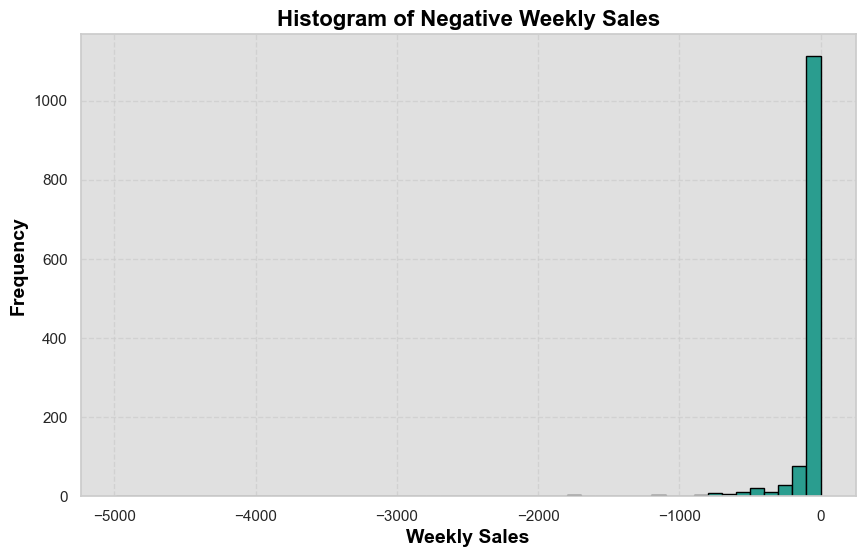

In [160]:


# Larger and more visually appealing histogram of negative sales values
plt.figure(figsize=(10, 6))  # Increase the size of the plot
plt.hist(negative_sales_df['Weekly_Sales'], bins=50, edgecolor='black', color='#2A9D8F')  # Teal color for consistency
plt.title('Histogram of Negative Weekly Sales', fontsize=16, weight='bold', color='black')
plt.xlabel('Weekly Sales', fontsize=14, weight='bold', color='black')
plt.ylabel('Frequency', fontsize=14, weight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.7)  # Light dashed grid
plt.gca().set_facecolor('#E0E0E0')  # Light gray background for consistency
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;"> <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Weekly Sales Data Quality Issues & Recommended Actions</h1> <p><strong>Action Plan:</strong></p> <ol> <li>Review the negative sales values to understand their source and nature, if possible, in a real-world scenario.</li> <li>Investigate whether these anomalies are due to data entry mistakes or other factors, and attempt to clarify the cause.</li> <li>If feasible, consult with the data provider or industry experts to validate or resolve these discrepancies.</li> <li>Given the unlikelihood of negative sales values being valid, it is advisable to remove these records from the dataset, as further discussion with the client is not possible.</li> </ol> <p><strong>Impact of Removal:</strong> Out of the 421,570 records in the dataset, 1,285 records contain negative sales values. Removing these will result in a reduction of approximately 0.31% of the total dataset.</p> </div>

In [97]:
# Assuming your DataFrame is named df
# Filter out rows where Weekly_Sales is negative
df = df[df['Weekly_Sales'] >= 0]



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Handling anomalies-markdown

</div>


In [98]:

# Assuming your DataFrame is named df
# List of markdown columns to process
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Replace negative values and NaN with 0 for the specified markdown columns
for column in markdown_columns:
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) or x < 0 else x)

# Verify the changes
print(df[markdown_columns].describe())


           MarkDown1      MarkDown2      MarkDown3      MarkDown4  \
count  420285.000000  420285.000000  420285.000000  420285.000000   
mean     2590.187246     878.898468     468.776513    1083.462694   
std      6053.225499    5076.506949    5533.592652    3895.801513   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%      2801.500000       2.400000       4.540000     425.290000   
max     88646.760000  104519.540000  141630.610000   67474.850000   

           MarkDown5  
count  420285.000000  
mean     1662.706138  
std      4205.946641  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%      2168.040000  
max    108519.280000  


<div style="background-color: #F9F9F9; padding: 15px; border-radius: 5px; font-size: 14px;">
  <p><strong>Filling Missing Markdown Values:</strong></p>
  <p>For the markdown columns with missing values (NaN) or negative values, we will replace them with zeros. Negative values in these columns are typically data errors, as markdowns represent discounts which should not be negative. Filling missing values with zeros ensures data consistency and allows for more accurate subsequent analysis.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 5. Exploratory Data Analysis

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.1 Univariate analysis-weekly sales

</div>

In [99]:
# Convert the 'Date' column to datetime format (if it's not already in this format)
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month, year, and week number from the 'Date' column
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.isocalendar().week

# Display the first few rows to confirm
print(df[['Store', 'Dept', 'Date', 'month', 'year', 'week', 'Weekly_Sales']].head())


   Store  Dept       Date  month  year  week  Weekly_Sales
0      1     1 2010-02-05      2  2010     5      24924.50
1      1     2 2010-02-05      2  2010     5      50605.27
2      1     3 2010-02-05      2  2010     5      13740.12
3      1     4 2010-02-05      2  2010     5      39954.04
4      1     5 2010-02-05      2  2010     5      32229.38


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.1.1 Data Table

</div>

In [100]:


# Assuming 'df' is already defined and contains the required data
# Grouping data and calculating monthly sales totals for each year
monthly_sales = df.groupby(['year', 'month'])['Weekly_Sales'].sum().reset_index()

# Grouping data and calculating weekly sales totals for each year
weekly_sales = df.groupby(['year', 'week'])['Weekly_Sales'].sum().reset_index()

# Convert to millions (M) for better understanding of results
monthly_sales['Weekly_Sales'] = monthly_sales['Weekly_Sales'] / 1_000_000
weekly_sales['Weekly_Sales'] = weekly_sales['Weekly_Sales'] / 1_000_000

# Pivot the table to a wider format
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='year', values='Weekly_Sales')
weekly_sales_pivot = weekly_sales.pivot(index='week', columns='year', values='Weekly_Sales')

# Formatting the monthly and weekly sales tables
monthly_table = tabulate(monthly_sales_pivot.round(2), headers=monthly_sales_pivot.columns, showindex=True, tablefmt="fancy_grid").split('\n')
weekly_table = tabulate(weekly_sales_pivot.round(2), headers=weekly_sales_pivot.columns, showindex=True, tablefmt="fancy_grid").split('\n')

# Find the maximum length of both tables for consistent formatting
max_len_monthly = max(len(line) for line in monthly_table)
max_len_weekly = max(len(line) for line in weekly_table)
max_height = max(len(monthly_table), len(weekly_table))

# Extend lines to the maximum height of both tables
monthly_table.extend([' ' * max_len_monthly] * (max_height - len(monthly_table)))
weekly_table.extend([' ' * max_len_weekly] * (max_height - len(weekly_table)))

# Print tables side-by-side
print("\033[92mMonthly and Weekly Sales in Millions (M):\033[0m\n")
for m, w in zip(monthly_table, weekly_table):
    print(m.ljust(max_len_monthly) + '   ' + w)


Monthly and Weekly Sales in Millions (M):

╒════╤════════╤════════╤════════╕   ╒════╤════════╤════════╤════════╕
│    │   2010 │   2011 │   2012 │   │    │   2010 │   2011 │   2012 │
╞════╪════════╪════════╪════════╡   ╞════╪════════╪════════╪════════╡
│  1 │ nan    │ 163.71 │ 168.9  │   │  1 │ nan    │  42.78 │  44.96 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  2 │ 190.34 │ 186.33 │ 192.07 │   │  2 │ nan    │  40.67 │  42.02 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  3 │ 181.92 │ 179.36 │ 231.51 │   │  3 │ nan    │  40.65 │  42.08 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  4 │ 231.41 │ 226.53 │ 188.92 │   │  4 │ nan    │  39.6  │  39.84 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  5 │ 186.71 │ 181.65 │ 188.77 │   │  5 │  49.75 │  46.15 │  46.09 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  6 │ 192.25 │ 189.77 │ 240.61 │   │  6 │  48.

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.1.2 Time Series Chart

</div>

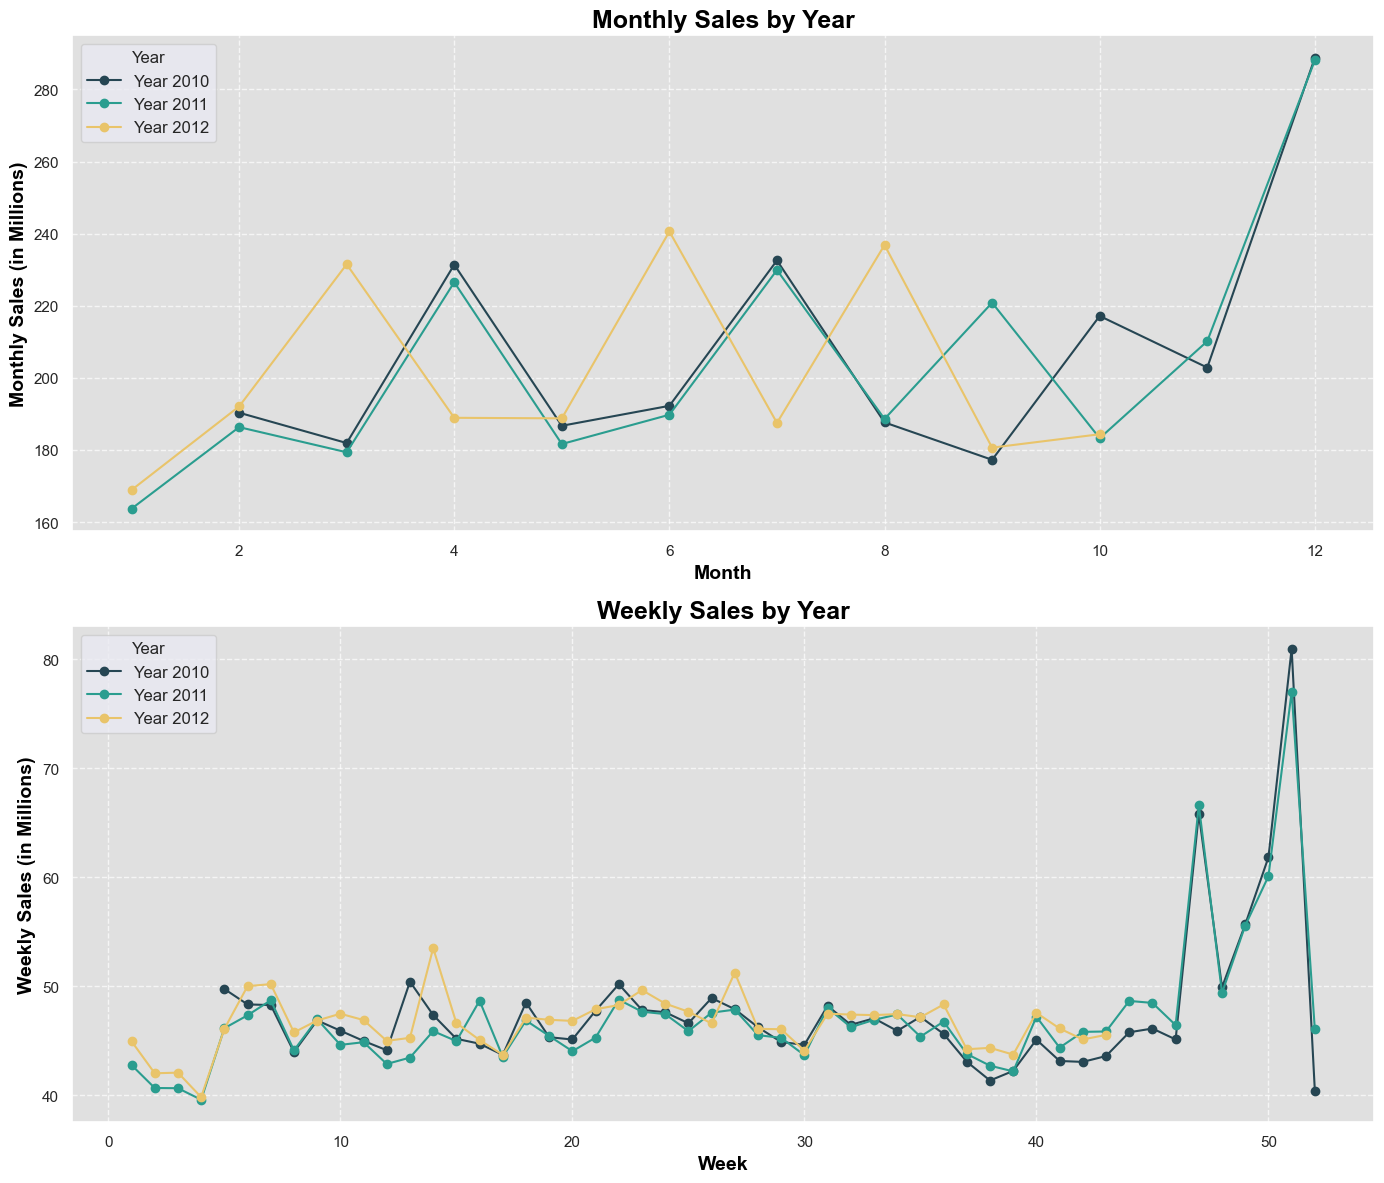

In [128]:
# Seaborn aesthetic settings
sns.set(style="darkgrid")  # Darker background for better readability

# Data preparation
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month", aggfunc='sum') / 1_000_000  
weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="week", aggfunc='sum') / 1_000_000  

# Convert data to NumPy
monthly_sales_np = monthly_sales.to_numpy()
weekly_sales_np = weekly_sales.to_numpy()
monthly_index = monthly_sales.index.to_numpy()
weekly_index = weekly_sales.index.to_numpy()

# Define color palette
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']  # Cohesive color palette

plt.figure(figsize=(14, 12))

# Line plot: Monthly sales
plt.subplot(2, 1, 1)
for i, (year, color) in enumerate(zip(monthly_sales.columns, colors)):
    plt.plot(monthly_index, monthly_sales_np[:, i], marker='o', linestyle='-', color=color, label=f'Year {year}')
plt.title('Monthly Sales by Year', fontsize=18, weight='bold', color='black')
plt.xlabel('Month', fontsize=14, weight='bold', color='black')
plt.ylabel('Monthly Sales (in Millions)', fontsize=14, weight='bold', color='black')
plt.legend(title='Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#E0E0E0')

# Line plot: Weekly sales
plt.subplot(2, 1, 2)
for i, (year, color) in enumerate(zip(weekly_sales.columns, colors)):
    plt.plot(weekly_index, weekly_sales_np[:, i], marker='o', linestyle='-', color=color, label=f'Year {year}')
plt.title('Weekly Sales by Year', fontsize=18, weight='bold', color='black')
plt.xlabel('Week', fontsize=14, weight='bold', color='black')
plt.ylabel('Weekly Sales (in Millions)', fontsize=14, weight='bold', color='black')
plt.legend(title='Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#E0E0E0')

plt.tight_layout()
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.1.3 Dynamic charts

</div>

In [130]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Seaborn aesthetic settings
sns.set(style="whitegrid")

# Data preparation
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month", aggfunc='sum')
weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="week", aggfunc='sum')

# Convert data to NumPy
monthly_sales_np = monthly_sales.to_numpy()
weekly_sales_np = weekly_sales.to_numpy()
monthly_index = monthly_sales.index.to_numpy()
weekly_index = weekly_sales.index.to_numpy()

# Retrieve unique years from the data
years = df['year'].unique()

# Function to update plots based on the selected time range
def update_plots(selected_years, start_month, end_month, start_week, end_week):
    # Filter data based on selected years
    filtered_df = df[df['year'].isin(selected_years)]
    
    # Prepare new data
    filtered_monthly_sales = pd.pivot_table(filtered_df, values="Weekly_Sales", columns="year", index="month", aggfunc='sum')
    filtered_weekly_sales = pd.pivot_table(filtered_df, values="Weekly_Sales", columns="year", index="week", aggfunc='sum')

    # Apply filters
    if start_month and end_month:
        filtered_monthly_sales = filtered_monthly_sales.loc[start_month:end_month]
    
    if start_week and end_week:
        filtered_weekly_sales = filtered_weekly_sales.loc[start_week:end_week]

    # Convert values to millions
    filtered_weekly_sales /= 1_000_000
    filtered_monthly_sales /= 1_000_000

    # **Dynamiczne przypisanie palety kolorów do liczby kategorii**
    num_months = len(filtered_monthly_sales)
    num_weeks = len(filtered_weekly_sales)
    
    month_palette = sns.color_palette("viridis", num_months) if num_months > 1 else ["#264653"]
    week_palette = sns.color_palette("magma", num_weeks) if num_weeks > 1 else ["#2A9D8F"]

    # Create the plots
    plt.figure(figsize=(14, 12))

    # Bar chart: Weekly sales
    plt.subplot(2, 1, 1)
    total_weekly_sales = filtered_weekly_sales.sum(axis=1).to_numpy()
    sns.barplot(x=filtered_weekly_sales.index, y=total_weekly_sales, palette=week_palette, edgecolor='black', alpha=0.9)
    plt.title('Total Weekly Sales (in millions)', fontsize=16, weight='bold', color='black')
    plt.xlabel('Week', fontsize=14, weight='bold', color='black')
    plt.ylabel('Total Weekly Sales (in millions)', fontsize=14, weight='bold', color='black')
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#E0E0E0')  # Light gray background

    # Bar chart: Monthly sales
    plt.subplot(2, 1, 2)
    total_monthly_sales = filtered_monthly_sales.sum(axis=1).to_numpy()
    sns.barplot(x=filtered_monthly_sales.index, y=total_monthly_sales, palette=month_palette, edgecolor='black', alpha=0.9)
    plt.title('Total Monthly Sales (in millions)', fontsize=16, weight='bold', color='black')
    plt.xlabel('Month', fontsize=14, weight='bold', color='black')
    plt.ylabel('Total Monthly Sales (in millions)', fontsize=14, weight='bold', color='black')
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#E0E0E0')  # Light gray background

    plt.tight_layout()
    plt.show()

# Widget for selecting years (multiple selection)
year_widget = widgets.SelectMultiple(
    options=sorted(years),
    value=[years.max()],  # Default to the latest year
    description='Years:',
    disabled=False
)

# Sliders for selecting time range
start_month_widget = widgets.IntSlider(
    min=monthly_index.min(),
    max=monthly_index.max(),
    value=monthly_index.min(),
    description='Start Month:',
    continuous_update=False
)

end_month_widget = widgets.IntSlider(
    min=monthly_index.min(),
    max=monthly_index.max(),
    value=monthly_index.max(),
    description='End Month:',
    continuous_update=False
)

start_week_widget = widgets.IntSlider(
    min=weekly_index.min(),
    max=weekly_index.max(),
    value=weekly_index.min(),
    description='Start Week:',
    continuous_update=False
)

end_week_widget = widgets.IntSlider(
    min=weekly_index.min(),
    max=weekly_index.max(),
    value=weekly_index.max(),
    description='End Week:',
    continuous_update=False
)

# Function to update plots based on selected values
def update_view(selected_years, start_month, end_month, start_week, end_week):
    update_plots(selected_years, start_month, end_month, start_week, end_week)

# Create widgets
ui = widgets.VBox([
    year_widget,
    widgets.HBox([start_month_widget, end_month_widget]),
    widgets.HBox([start_week_widget, end_week_widget])
])

# Interactive widget
out = widgets.interactive_output(update_view, {
    'selected_years': year_widget,
    'start_month': start_month_widget,
    'end_month': end_month_widget,
    'start_week': start_week_widget,
    'end_week': end_week_widget
})

display(ui, out)


Output()

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.1.4 Dynamic Statistics

</div>

In [131]:

# Data preparation
df["Date"] = pd.to_datetime(df["Date"])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Function to update the table based on selected filters
def update_table(time_period, year=None, month=None, week=None):
    filtered_df = df.copy()
    
    if time_period == 'year' and year is not None:
        filtered_df = filtered_df[filtered_df['year'] == year]
    elif time_period == 'month' and month is not None:
        filtered_df = filtered_df[filtered_df['month'] == month]
    elif time_period == 'week' and week is not None:
        filtered_df = filtered_df[filtered_df['week'] == week]

    # Group and summarize data
    table = filtered_df.groupby(['year', 'month', 'week'])['Weekly_Sales'].agg(['mean', 'sum', 'count']).reset_index()
    display(table)

# Interactive widgets
time_period_widget = widgets.Dropdown(
    options=['year', 'month', 'week'],
    value='year',
    description='Time Period:',
)

year_widget = widgets.Dropdown(
    options=[None] + [year for year in df['year'].unique()],
    value=None,
    description='Year:',
)

month_widget = widgets.Dropdown(
    options=[None] + [month for month in df['month'].unique()],
    value=None,
    description='Month:',
)

week_widget = widgets.Dropdown(
    options=[None] + [week for week in df['week'].unique()],
    value=None,
    description='Week:',
)

# Function to update the interactive table
def update_interactive_table(time_period, year, month, week):
    update_table(time_period, year, month, week)

# Displaying widgets and table
widgets.interactive(update_interactive_table, 
                    time_period=time_period_widget, 
                    year=year_widget, 
                    month=month_widget, 
                    week=week_widget)


interactive(children=(Dropdown(description='Time Period:', options=('year', 'month', 'week'), value='year'), D…

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Insights</h1>

  <p><strong>1. Missing Values:</strong> Both the monthly and weekly datasets contain missing values, which must be addressed in order to ensure accurate trend analysis and reliable forecasting.</p>

  <p><strong>2. Sales Trends:</strong></p>
  <p><strong>Monthly Sales:</strong></p>
  <ul>
    <li><strong>Fluctuations:</strong> Significant variations, especially around the end-of-year period, are noticeable.</li>
    <li><strong>End-of-Year Growth:</strong> Sales consistently spike in November and December.</li>
    <li><strong>Seasonal Patterns:</strong> Moderate growth is observed in spring (March-May) and summer (June-August).</li>
  </ul>

  <p><strong>Weekly Sales:</strong></p>
  <ul>
    <li><strong>Consistent Growth:</strong> A steady upward trend has been observed in recent years.</li>
    <li><strong>Holiday Peaks:</strong> Sales exhibit noticeable spikes during the holiday season.</li>
    <li><strong>Seasonal Trends:</strong> Significant growth is also seen in early spring (Weeks 10-15).</li>
  </ul>
  
  <p><i>Note: Sales during early 2011 (Weeks 1 and 2) surpassed 42 million, but no data is available for the same period in 2010.</i></p>

  <p><strong>3. Data Gaps:</strong> In the weekly sales data for 2012, a gap is present in Weeks 44-52. This may indicate issues with reporting or missing data for this period.</p>

  <p><strong>4. Sales Patterns:</strong></p>
  <ul>
    <li><strong>Holiday Spikes:</strong> Sales during December (Weeks 51-52) typically surge, likely driven by holiday shopping.</li>
    <li><strong>General Stability:</strong> Sales remain relatively stable throughout most of the year, with clear peaks during holidays.</li>
    <li><strong>2012 Variability:</strong> Towards the end of 2012, a noticeable decline in sales occurred, potentially due to changes in the market environment.</li>
  </ul>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.2 Holidays and Seasonality

</div>

In [132]:


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# List of holiday dates
holiday_dates = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10',
                                 '2010-09-10', '2011-09-09', '2012-09-07',
                                 '2010-11-26', '2011-11-25',
                                 '2010-12-31', '2011-12-30'], format='%Y-%m-%d')

# Add 'IsHoliday' column based on the presence of the date in the holiday list
df['IsHoliday'] = df['Date'].isin(holiday_dates)



In [133]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 




array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.2.1 Comparing average weekly sales when holiday or not


</div>

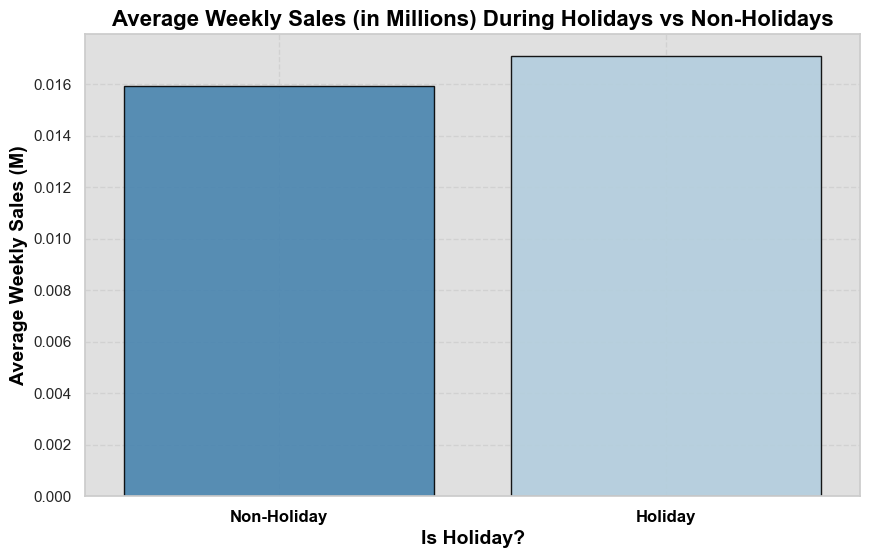

In [136]:
# Calculate the average weekly sales for holidays and non-holidays
average_sales_holiday = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Convert to millions (M) for better understanding of results
average_sales_holiday['Weekly_Sales'] /= 1_000_000

# Set Seaborn aesthetics
sns.set(style="whitegrid")

# Create a bar plot with new color scheme
plt.figure(figsize=(10, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=average_sales_holiday, 
            palette=sns.color_palette("Blues_r", 2), edgecolor='black', alpha=0.9)

# Title and labels
plt.title('Average Weekly Sales (in Millions) During Holidays vs Non-Holidays', 
          fontsize=16, weight='bold', color='black')
plt.xlabel('Is Holiday?', fontsize=14, weight='bold', color='black')
plt.ylabel('Average Weekly Sales (M)', fontsize=14, weight='bold', color='black')

# Custom x-ticks labels
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], fontsize=12, weight='bold', color='black')

# Grid and background
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#E0E0E0')  # Light gray background

plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.2.2 Holidays naming

</div>

In [137]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Add a 'Year' column extracted from 'Date'
df['year'] = df['Date'].dt.year
# Add a 'Week_Number' column extracted from 'Date'
df['week'] = df['Date'].dt.isocalendar().week


# List of dates for different types of holidays
super_bowl_dates = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10'], format='%Y-%m-%d')
labor_day_dates = pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07'], format='%Y-%m-%d')
thanksgiving_dates = pd.to_datetime(['2010-11-26', '2011-11-25'], format='%Y-%m-%d')
christmas_dates = pd.to_datetime(['2010-12-31', '2011-12-30'], format='%Y-%m-%d')

# Create columns for different types of holidays
df['Super_Bowl'] = df['Date'].isin(super_bowl_dates)
df['Labor_Day'] = df['Date'].isin(labor_day_dates)
df['Thanksgiving'] = df['Date'].isin(thanksgiving_dates)
df['Christmas'] = df['Date'].isin(christmas_dates)



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.2.3 Number of week connected to event

</div>

In [138]:


# Sample data - update holidays according to your case
holidays = {
    'Super_Bowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
    'Labor_Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
    'Thanksgiving': ['2010-11-26', '2011-11-25'],
    'Christmas': ['2010-12-31', '2011-12-30']
}

# Function to calculate the week of the year for a given date
def get_week_of_year(date_str):
    # Convert the date from string format to a datetime object
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    # Calculate the week number of the year
    return date_obj.isocalendar()[1]

# Calculating the week of the year for each holiday
for holiday, dates in holidays.items():
    print(f"{holiday}:")
    for date in dates:
        week_number = get_week_of_year(date)
        print(f"  {date} -> Week {week_number}")


Super_Bowl:
  2010-02-12 -> Week 6
  2011-02-11 -> Week 6
  2012-02-10 -> Week 6
Labor_Day:
  2010-09-10 -> Week 36
  2011-09-09 -> Week 36
  2012-09-07 -> Week 36
Thanksgiving:
  2010-11-26 -> Week 47
  2011-11-25 -> Week 47
Christmas:
  2010-12-31 -> Week 52
  2011-12-30 -> Week 52


In [139]:
# Range of weeks for each holiday
holiday_windows = {
    'Super_Bowl': {'weeks': [4, 5, 6]},
    'Labor_Day': {'weeks': [35, 36]},
    'Thanksgiving': {'weeks': [46, 47]},
    'Christmas': {'weeks': [49, 50, 51, 52]}
}

# Function to create a new DataFrame with data for specified weeks and years, grouped by 'Type'
def filter_and_sum_sales_by_holidays_and_type(df, years):
    filtered_data = []

    # Iterating through years
    for year in years:
        df_year = df[df['year'] == year]
        
        for holiday, info in holiday_windows.items():
            weeks = info['weeks']
            df_filtered = df_year[df_year['week'].isin(weeks)]

            for week in weeks:
                week_data = df_filtered[df_filtered['week'] == week]
                if not week_data.empty:
                    # Grouping by 'Type' and summing sales
                    sales_by_type = week_data.groupby('Type')['Weekly_Sales'].sum()
                    for type_, total_sales in sales_by_type.items():
                        filtered_data.append({
                            'year': year,
                            'week': week,
                            'Weekly_Sales': total_sales,
                            'Event': holiday,
                            'Type': type_
                        })
    
    return pd.DataFrame(filtered_data)

# Example usage

# Filtering data and summing sales for the years 2010, 2011, 2012
years = [2010, 2011, 2012]
filtered_df = filter_and_sum_sales_by_holidays_and_type(df, years)

# Displaying the results
filtered_df


,year,week,Weekly_Sales,Event,Type
0,2010,5,32144231.25,Super_Bowl,A
1,2010,5,14775516.11,Super_Bowl,B
2,2010,5,2831128.62,Super_Bowl,C
3,2010,6,30982620.79,Super_Bowl,A
4,2010,6,14439248.06,Super_Bowl,B
...,...,...,...,...,...
73,2012,35,14064072.54,Labor_Day,B
74,2012,35,2839774.10,Labor_Day,C
75,2012,36,31179820.25,Labor_Day,A
76,2012,36,14079993.19,Labor_Day,B


In [140]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,year,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Event,Has_Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,2010,5,False,False,False,False,None,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,2010,5,False,False,False,False,None,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,2010,5,False,False,False,False,None,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,2010,5,False,False,False,False,None,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,2010,5,False,False,False,False,None,False


In [141]:


# Przykładowe dane - zaktualizuj je zgodnie z własnym przypadkiem
holidays = {
    'Super_Bowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
    'Labor_Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
    'Thanksgiving': ['2010-11-26', '2011-11-25'],
    'Christmas': ['2010-12-31', '2011-12-30']
}

# Zakładając, że masz dataframe df z kolumną 'Date' (jako string lub datetime)
# Jeśli 'Date' to string, najlepiej je przekonwertować na datetime
df['Date'] = pd.to_datetime(df['Date'])

# Funkcja, która sprawdza datę i przypisuje wydarzenie
def determine_event(row):
    for event, dates in holidays.items():
        if row['Date'].strftime('%Y-%m-%d') in dates:
            return event
    return None  # Jeśli nie pasuje do żadnego wydarzenia

# Dodanie nowej kolumny 'Event' do dataframe
df['Event'] = df.apply(determine_event, axis=1)





<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.2.4 Average sales in events weeks/comparing top overall average sales

</div>

In [142]:


# Range of weeks for each holiday
holiday_windows = {
    'Super_Bowl': {'weeks': [4, 5, 6]},
    'Labor_Day': {'weeks': [35, 36]},
    'Thanksgiving': {'weeks': [46, 47]},
    'Christmas': {'weeks': [49, 50, 51, 52]}
}

def plot_sales_for_year_plotly(df, year):
    # Color list for marking
    colors = {
        'Super_Bowl': 'darkgrey',
        'Labor_Day': 'darkgrey',
        'Thanksgiving': 'darkgrey',
        'Christmas': 'darkgrey'
    }
    
    # Weeks to highlight in red
    highlight_weeks = {6, 36, 47, 51}
    all_highlight_weeks = {4, 5, 6, 35, 36, 46, 47, 49, 50, 51, 52}

    # Filtering the data
    df_year = df[df['year'] == year]
    
    # Calculating averages
    avg_sales_year = df_year['Weekly_Sales'].mean()
    avg_sales_excluding = df_year[~df_year['week'].isin(all_highlight_weeks)]['Weekly_Sales'].mean()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Average sales in events =>plot

</div>

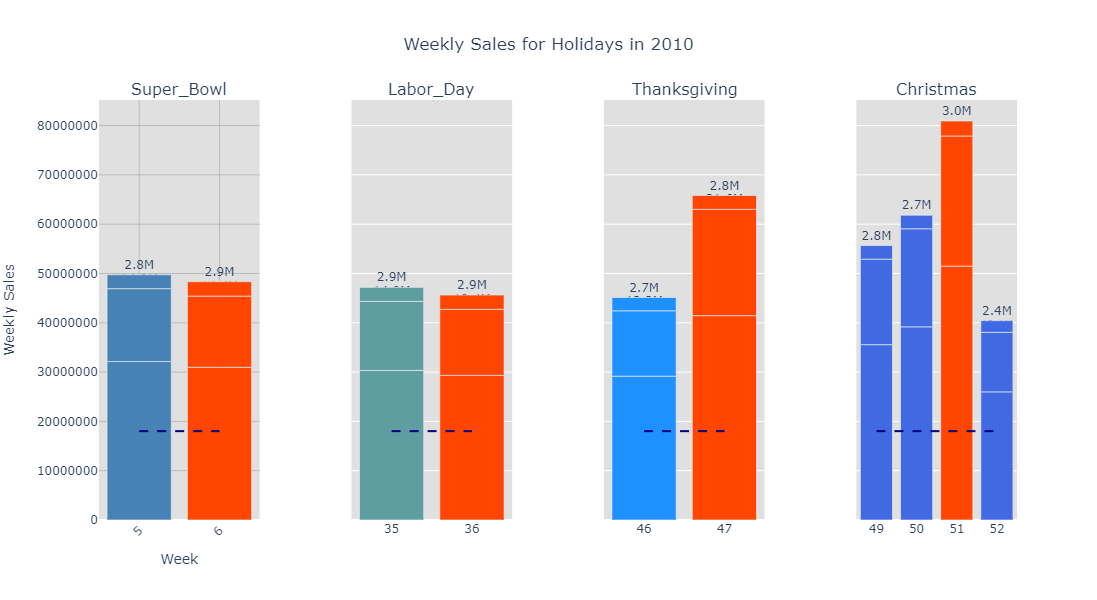

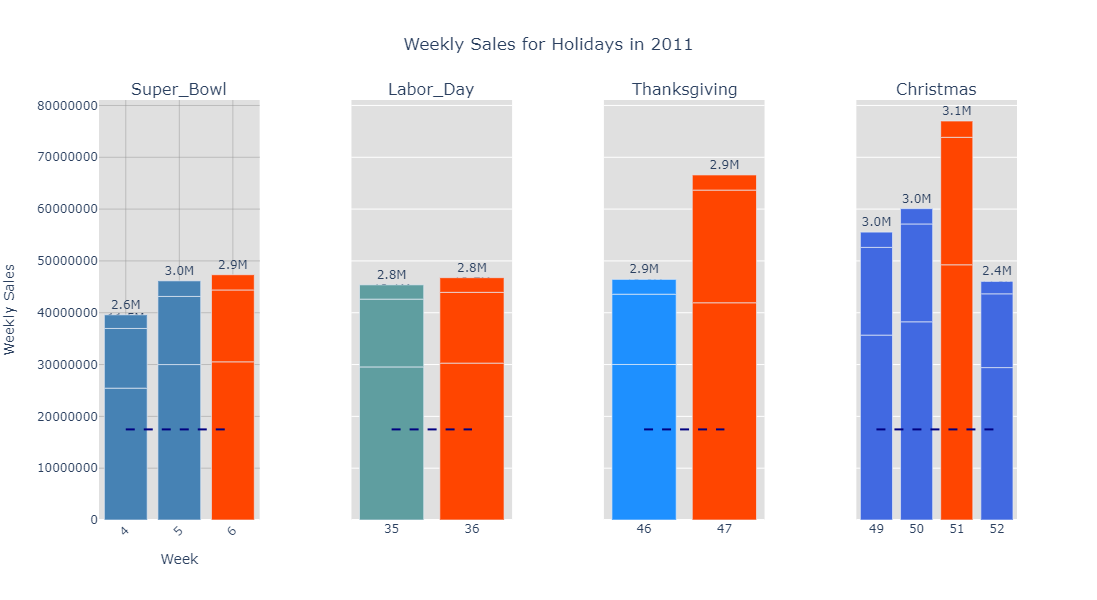

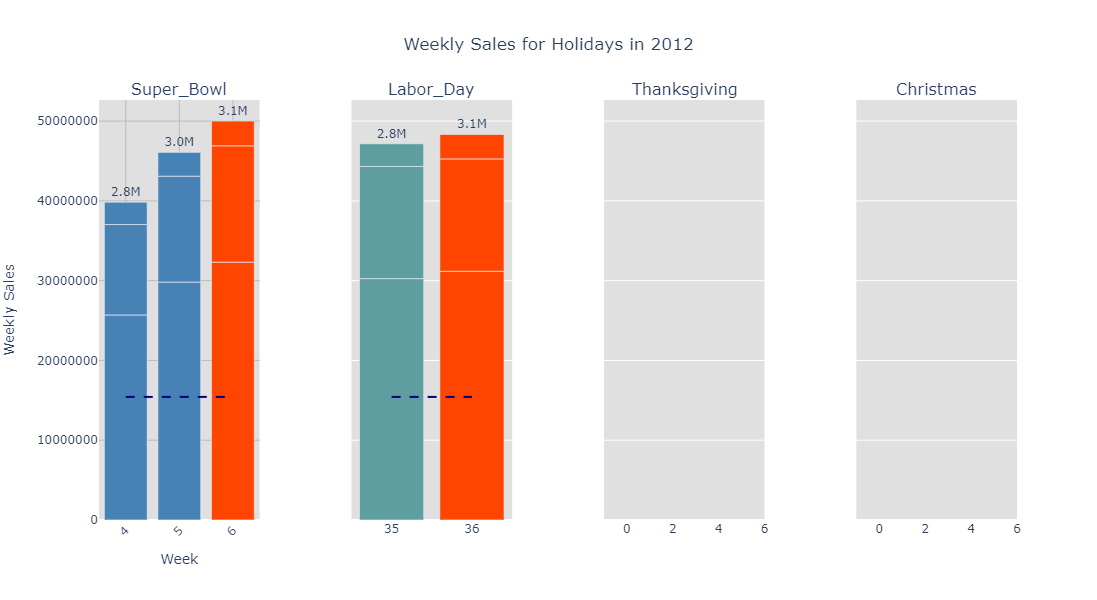

In [143]:
# Adjusted colors for a more professional, cool-themed look
colors = {
    'Super_Bowl': '#4682B4',  # Steel blue
    'Labor_Day': '#5F9EA0',   # Cadet blue
    'Thanksgiving': '#1E90FF',  # Dodger blue
    'Christmas': '#4169E1'    # Royal blue
}

def plot_sales_for_year_plotly(df, year):
    # Weeks to highlight
    highlight_weeks = {6, 36, 47, 51}
    all_highlight_weeks = {4, 5, 6, 35, 36, 46, 47, 49, 50, 51, 52}

    # Filter data
    df_year = df[df['year'] == year]
    
    # Calculate averages
    avg_sales_year = df_year['Weekly_Sales'].mean()
    avg_sales_excluding = df_year[~df_year['week'].isin(all_highlight_weeks)]['Weekly_Sales'].mean()

    # Create subplots - 1 row, 4 columns
    fig = make_subplots(
        rows=1, cols=4,
        subplot_titles=list(holiday_windows.keys()),
        shared_xaxes=True, shared_yaxes=True,
        horizontal_spacing=0.1  # Increase space between subplots
    )
    
    # Draw charts for each holiday
    for i, (event, info) in enumerate(holiday_windows.items()):
        df_event = df[(df['year'] == year) & (df['Event'] == event)]
        
        # Draw bars
        fig.add_trace(
            go.Bar(
                x=df_event['week'].astype(str),
                y=df_event['Weekly_Sales'],
                name=event,
                marker_color=[ '#FF4500' if week in highlight_weeks else colors[event] for week in df_event['week']],
                text=df_event['Weekly_Sales'].apply(lambda x: f'{x / 1e6:.1f}M'),
                textposition='outside'
            ),
            row=1, col=i + 1
        )
        
        # Average sales line for the entire year (dark blue)
        fig.add_trace(
            go.Scatter(
                x=[df_event['week'].min(), df_event['week'].max()],
                y=[avg_sales_year] * 2,
                mode='lines',
                line=dict(color='#000080', dash='dash'),  # Dark blue line
                showlegend=False
            ),
            row=1, col=i + 1
        )

        # Average sales line excluding highlighted weeks (dark red)
        fig.add_trace(
            go.Scatter(
                x=[df_event['week'].min(), df_event['week'].max()],
                y=[avg_sales_excluding] * 2,
                mode='lines',
                line=dict(color='#8B0000', dash='dash'),  # Dark red line
                showlegend=False
            ),
            row=1, col=i + 1
        )

    # Axis settings
    fig.update_layout(
        title_text=f'Weekly Sales for Holidays in {year}',
        title_x=0.5,
        xaxis_title='Week',
        yaxis_title='Weekly Sales',
        xaxis_tickangle=-45,
        yaxis=dict(
            tickformat='.0f',
            gridcolor='rgba(150, 150, 150, 0.5)'  # Subtle grid color
        ),
        height=600,
        width=1800,
        showlegend=False,
        plot_bgcolor='#E0E0E0',  # Matching previous backgrounds
        xaxis=dict(
            gridcolor='rgba(150, 150, 150, 0.5)'
        )
    )

    fig.show()

# Filter data for the years 2010, 2011, and 2012
years = [2010, 2011, 2012]
for year in years:
    filtered_df_year = filtered_df[filtered_df['year'] == year]
    plot_sales_for_year_plotly(filtered_df_year, year)



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.3 Shop Type efects(A/B/C) 

</div>

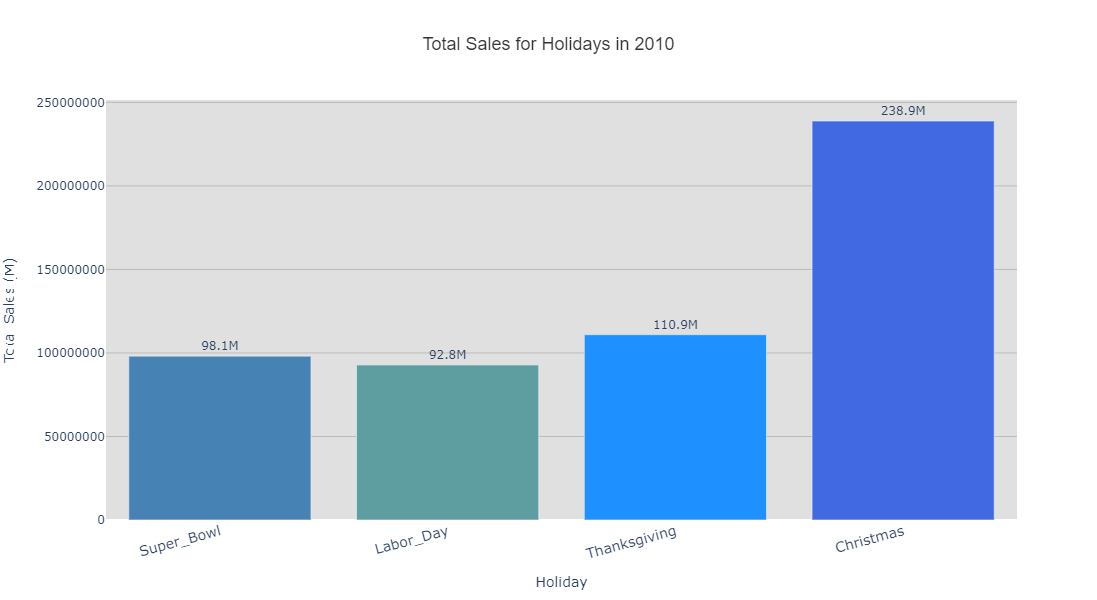

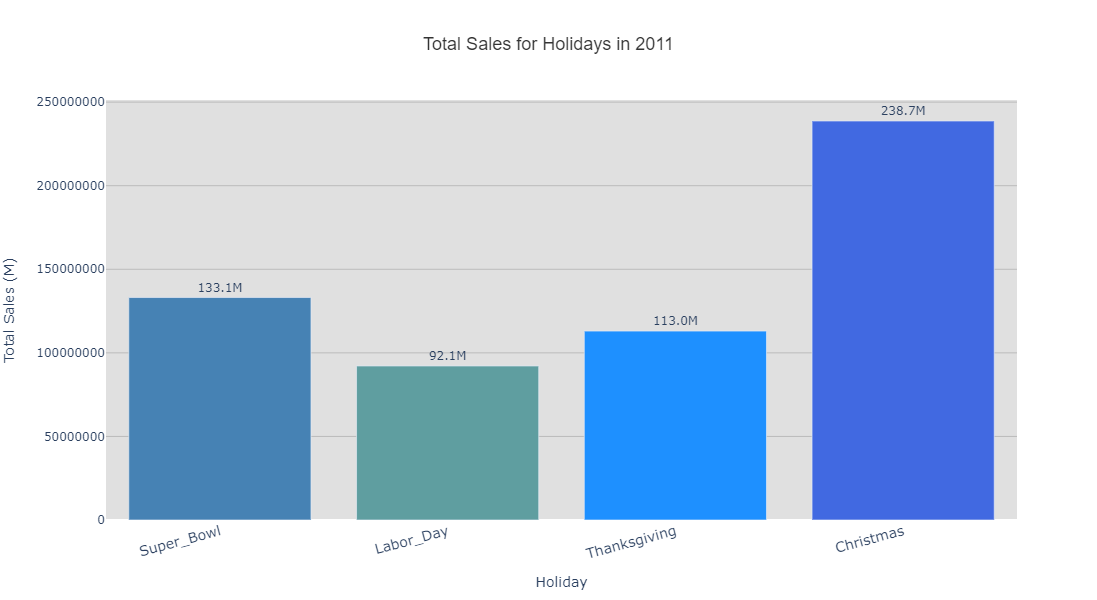

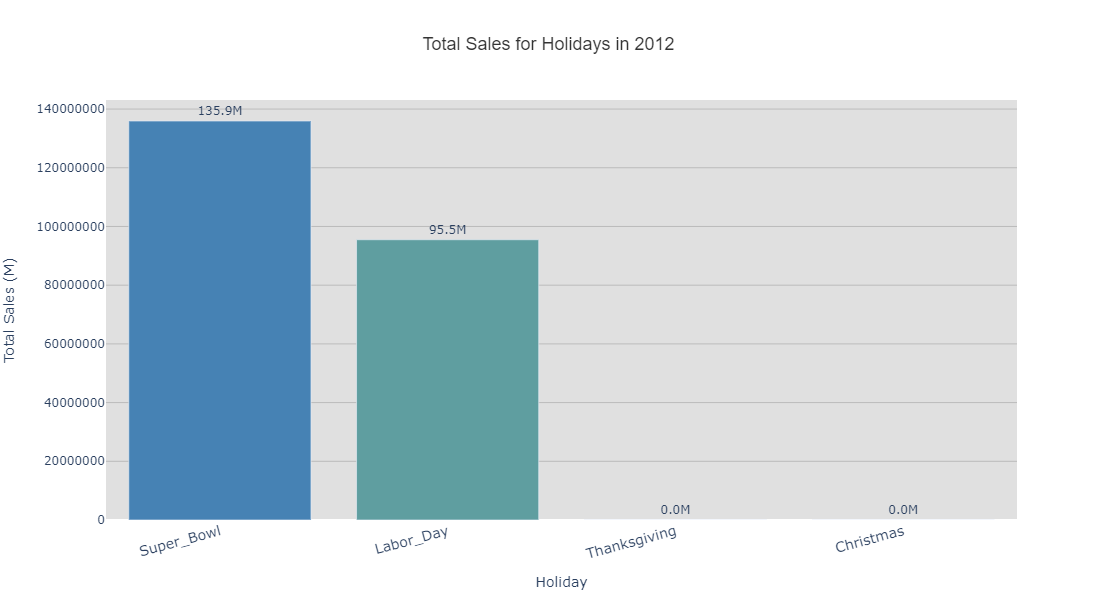

In [144]:
# Adjusted colors to fit the previous "cool blue" theme
holiday_colors = {
    'Super_Bowl': '#4682B4',  # Steel blue
    'Labor_Day': '#5F9EA0',   # Cadet blue
    'Thanksgiving': '#1E90FF',  # Dodger blue
    'Christmas': '#4169E1'    # Royal blue
}

def plot_total_sales_by_holiday(df, year):
    # Filter the data
    df_year = df[df['year'] == year]
    
    # Calculate total sales for each holiday
    total_sales_by_holiday = {}
    
    for event, info in holiday_windows.items():
        weeks = info['weeks']
        df_event = df_year[df_year['week'].isin(weeks)]
        
        # Sum the sales
        total_sales = df_event['Weekly_Sales'].sum()
        total_sales_by_holiday[event] = total_sales

    # Create the bar chart
    fig = go.Figure()
    
    fig.add_trace(
        go.Bar(
            x=list(total_sales_by_holiday.keys()),
            y=list(total_sales_by_holiday.values()),
            marker_color=[holiday_colors[event] for event in total_sales_by_holiday.keys()],
            text=[f'{value / 1e6:.1f}M' for value in total_sales_by_holiday.values()],
            textposition='outside'
        )
    )

    # Axis settings
    fig.update_layout(
        title_text=f'Total Sales for Holidays in {year}',
        title_x=0.5,
        title_font=dict(size=18, color='#333', family='Arial'),
        xaxis_title='Holiday',
        yaxis_title='Total Sales (M)',
        xaxis=dict(
            tickfont=dict(size=14),
            tickangle=-15  # Slightly tilted labels for readability
        ),
        yaxis=dict(
            tickformat='.0f',
            gridcolor='rgba(150, 150, 150, 0.5)'
        ),
        height=600,
        width=1000,
        showlegend=False,
        plot_bgcolor='#E0E0E0'
    )

    fig.show()

# Filter data for the years 2010, 2011, and 2012
years = [2010, 2011, 2012]
for year in years:
    filtered_df_year = filtered_df[filtered_df['year'] == year]
    plot_total_sales_by_holiday(filtered_df_year, year)


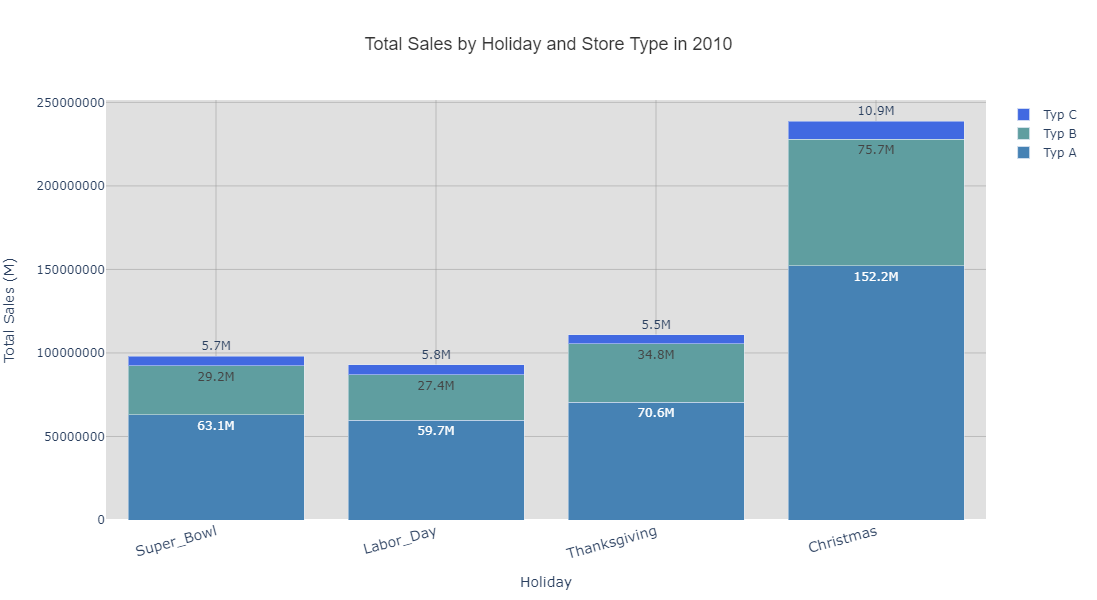

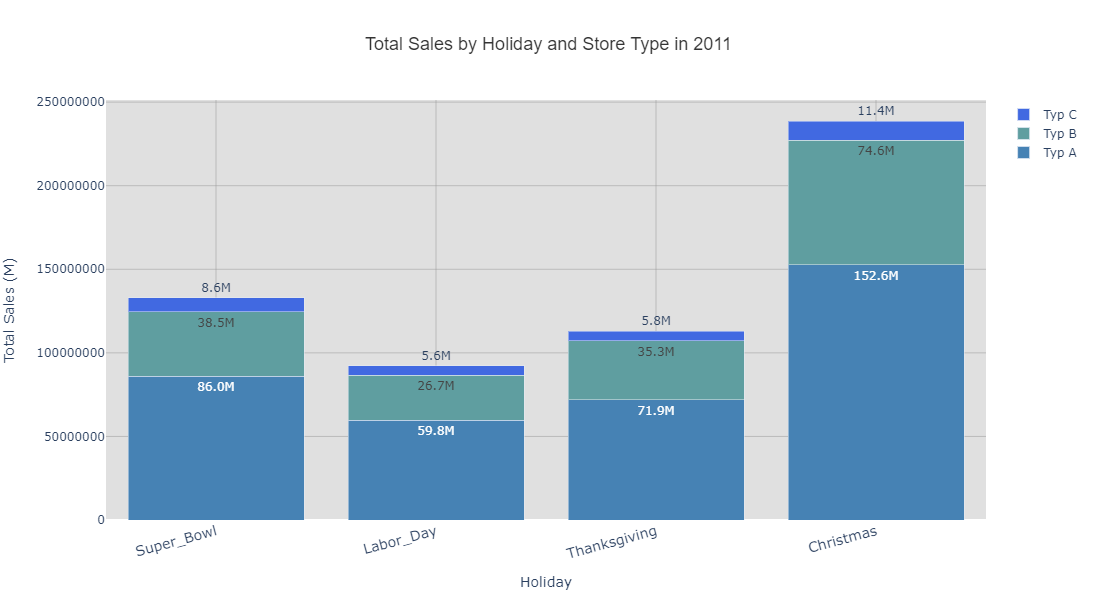

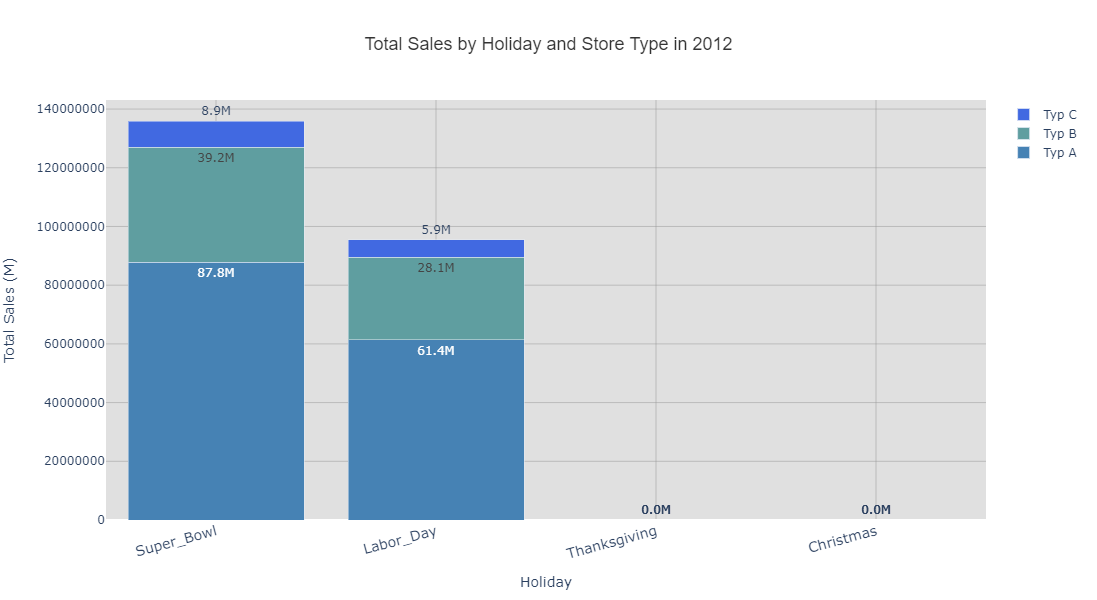

In [145]:
# Zaktualizowane kolory dla typów sklepów w stylu "coolblue"
type_colors = {
    'A': '#4682B4',  # Steel blue (dopasowane do tematu "cool blue")
    'B': '#5F9EA0',  # Cadet blue
    'C': '#4169E1'   # Royal blue
}

def plot_total_sales_by_holiday_and_type(df, year):
    # Filtrujemy dane
    df_year = df[df['year'] == year]
    
    # Tworzymy wykres słupkowy
    fig = go.Figure()
    
    # Dodajemy dane dla każdego typu sklepu
    for type_, color in type_colors.items():
        # Filtrujemy dane dla konkretnego typu sklepu
        sales_by_holiday = []
        for event, info in holiday_windows.items():
            weeks = info['weeks']
            df_event = df_year[df_year['week'].isin(weeks)]
            sales = df_event[df_event['Type'] == type_]['Weekly_Sales'].sum()
            sales_by_holiday.append(sales)
        
        fig.add_trace(
            go.Bar(
                x=list(holiday_windows.keys()),  # Święta jako osie X
                y=sales_by_holiday,
                name=f'Typ {type_}',  # Typ sklepu jako nazwa
                marker_color=color,  # Kolor typu sklepu
                text=[f'{value / 1e6:.1f}M' for value in sales_by_holiday],
                textposition='outside'
            )
        )
    
    # Ustawienia osi
    fig.update_layout(
        title_text=f'Total Sales by Holiday and Store Type in {year}',
        title_x=0.5,
        title_font=dict(size=18, color='#333', family='Arial'),  # Dopasowanie czcionki tytułu
        xaxis_title='Holiday',
        yaxis_title='Total Sales (M)',  # Zmiana jednostek na miliony
        barmode='stack',  # Słupki będą nałożone
        yaxis=dict(
            tickformat='.0f',  # Formatowanie liczb bez przecinków
            gridcolor='rgba(150, 150, 150, 0.5)'  # Kolor linii siatki pasujący do pierwszego wykresu
        ),
        height=600,
        width=1000,  # Zwiększona szerokość dla lepszej wizualizacji
        showlegend=True,  # Pokaż legendę
        plot_bgcolor='#E0E0E0',  # Tło wykresu pasujące do pierwszego wykresu
        xaxis=dict(
            tickfont=dict(size=14),  # Czcionka etykiet osi X
            tickangle=-15,  # Lekko pochylone etykiety dla lepszej czytelności
            gridcolor='rgba(150, 150, 150, 0.5)'  # Kolor linii siatki
        )
    )
    
    fig.show()

# Filtrujemy dane dla lat 2010, 2011 i 2012
years = [2010, 2011, 2012]
for year in years:
    filtered_df_year = filtered_df[filtered_df['year'] == year]
    plot_total_sales_by_holiday_and_type(filtered_df_year, year)


In [146]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,year,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Event,Has_Markdown
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,0.00,0.0,0.00,0.00,0.00,126.669267,9.003,B,126512,11,2010,47,False,False,True,False,Thanksgiving,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,0.0,58563.24,20.97,6386.86,140.421786,8.745,B,103681,11,2011,47,False,False,True,False,Thanksgiving,True
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,11,2011,47,False,False,True,False,Thanksgiving,True
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,0.00,0.0,0.00,0.00,0.00,136.689571,8.763,B,103681,11,2010,47,False,False,True,False,Thanksgiving,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,0.00,0.0,0.00,0.00,0.00,182.783277,8.724,A,200898,11,2010,47,False,False,True,False,Thanksgiving,False


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Sales Analysis During Holidays</h1>

  <p>
    The graph clearly shows that the highest average sales occur during the weeks of Thanksgiving and Christmas. Furthermore, it is evident that for all holidays, Type A stores report the highest sales figures. As expected, the top 5 weeks with the highest sales are all concentrated around Thanksgiving.
  </p>
</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.4 Size-type relation

</div>

In [147]:
df_stores.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


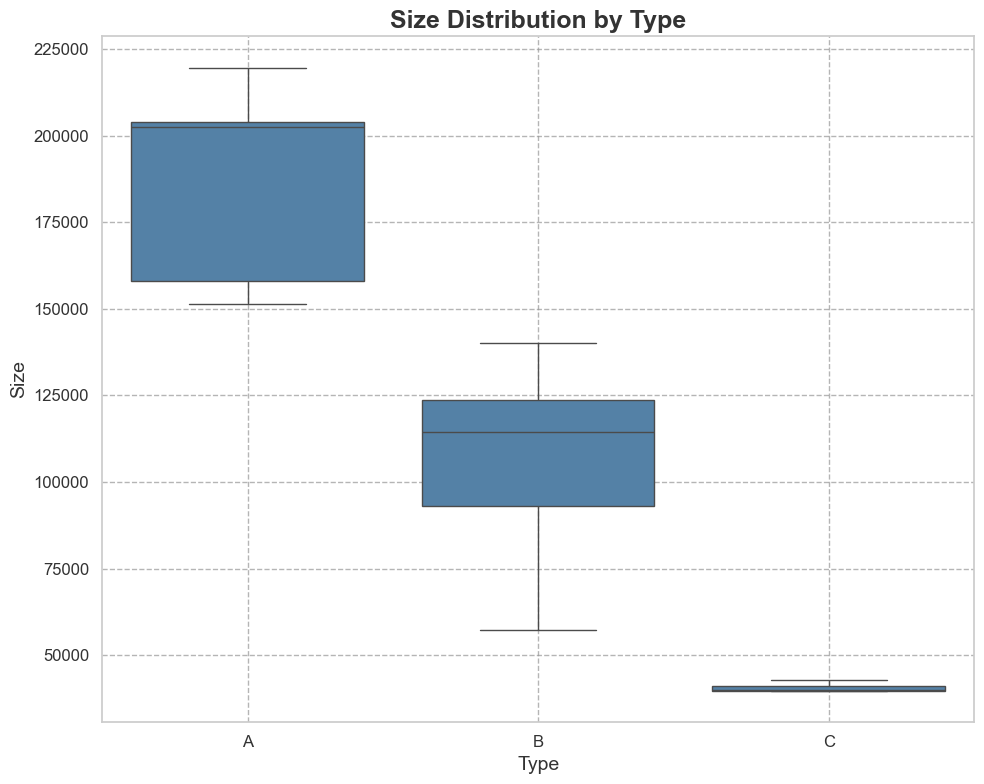

In [150]:

# Set the style for seaborn
sns.set(style="whitegrid", palette=["#4682B4", "#5F9EA0", "#4169E1"])

# Create a figure with a specified size
plt.figure(figsize=(10, 8))

# Create the boxplot
sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

# Add title and labels
plt.title('Size Distribution by Type', fontsize=18, weight='bold', color='#333')  # Title color adjusted
plt.xlabel('Type', fontsize=14, color='#333')  # X-axis label color
plt.ylabel('Size', fontsize=14, color='#333')  # Y-axis label color

# Customize font and tick parameters
plt.xticks(fontsize=12, color='#333')  # X-axis ticks color
plt.yticks(fontsize=12, color='#333')  # Y-axis ticks color

# Add a grid for better readability with a corrected color for grid lines
plt.grid(True, linestyle='--', alpha=0.7, color=(150/255, 150/255, 150/255, 0.5))  # Adjusted RGBA format

# Adjust layout to make it tight
plt.tight_layout()

# Show the plot
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Store Size and Sales Relationship</h1>

  <p>
    The size of the store types is directly correlated with their sales performance, as expected. Larger stores tend to have higher sales. Walmart classifies stores according to their sizes, as illustrated in the graph. Type A stores are the smallest, followed by Type B stores, and then Type C stores, which have the largest size values.
  </p>
</div>




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.5 Markdowns

</div>

In [151]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
year                 0
week                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
Event           390722
Has_Markdown         0
dtype: int64


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.5.1 Comparing sales in days with discounts(markdowns) and without them

</div>

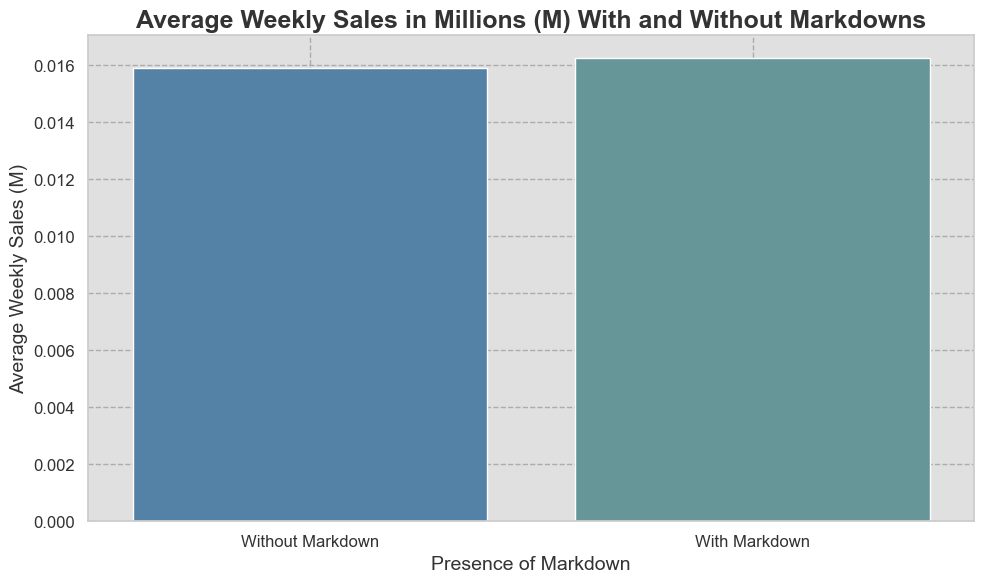

In [153]:
# Set the style for seaborn to match the previous style
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Has_Markdown', y='Weekly_Sales', data=average_sales, palette=["#4682B4", "#5F9EA0"])

# Add title and labels with consistent styling
plt.title('Average Weekly Sales in Millions (M) With and Without Markdowns', fontsize=18, weight='bold', color='#333')  # Title with custom color
plt.xlabel('Presence of Markdown', fontsize=14, color='#333')  # X-axis label color
plt.ylabel('Average Weekly Sales (M)', fontsize=14, color='#333')  # Y-axis label color

# Customize x-ticks and y-ticks
plt.xticks([0, 1], ['Without Markdown', 'With Markdown'], fontsize=12, color='#333')  # X-axis labels with custom font and color
plt.yticks(fontsize=12, color='#333')  # Y-axis labels with custom font and color

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7, color=(150/255, 150/255, 150/255, 0.5))  # Lighter grid color for consistency

# Set background color to light gray for consistency with previous plots
plt.gca().set_facecolor('#E0E0E0')

# Adjust layout to make it tight
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

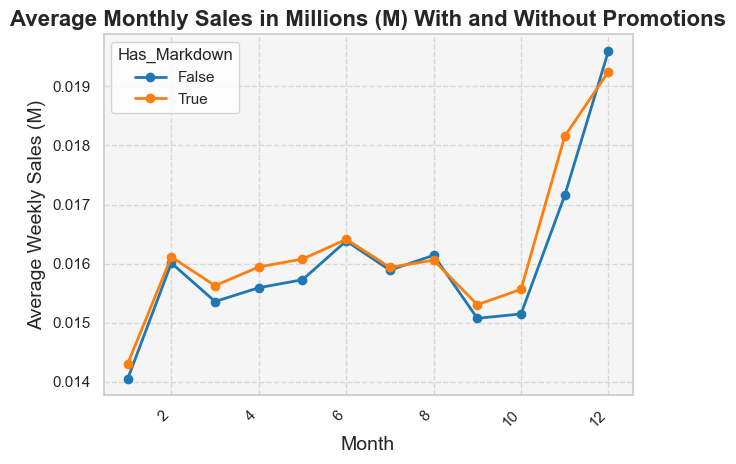

In [155]:
# Comparison of average sales in months with and without promotions
monthly_sales = df.groupby(['month', 'Has_Markdown'])['Weekly_Sales'].mean().unstack()

# Convert to millions (M) for better understanding of results
monthly_sales /= 1_000_000

# Set Seaborn aesthetics
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', linewidth=2, marker='o', color=["#1f77b4", "#ff7f0e"])

# Add title and labels with customized styling
plt.title('Average Monthly Sales in Millions (M) With and Without Promotions', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Weekly Sales (M)', fontsize=14)

# Customize x-axis ticks and grid
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')  # Light gray background

# Show the plot
plt.tight_layout()
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.5.1.1   Markdown/sales correlation

</div>

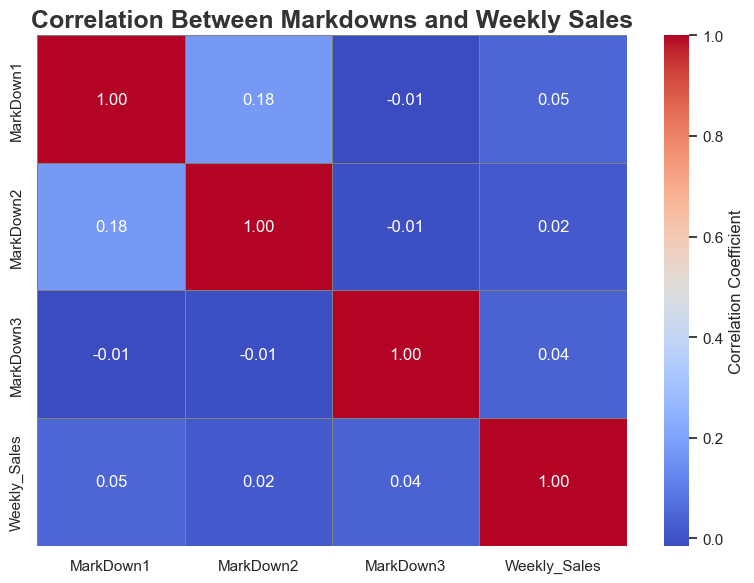

In [156]:


# Set the style for seaborn to match previous plots
sns.set(style="whitegrid")

# Create the heatmap with customized settings
plt.figure(figsize=(8, 6))

# Use a "cool blue" color palette for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Correlation Coefficient'})

# Add title with customized styling
plt.title('Correlation Between Markdowns and Weekly Sales', fontsize=18, weight='bold', color='#333')  # Title color

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


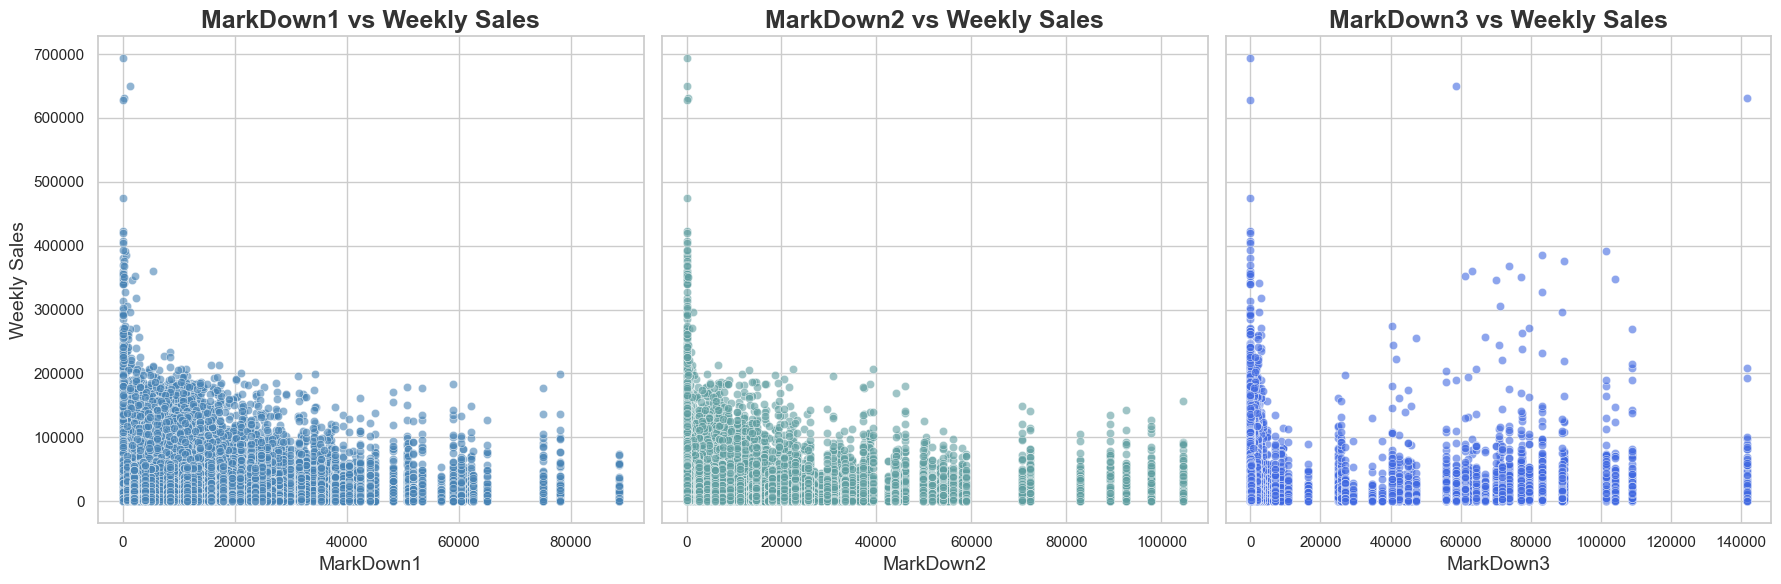

In [157]:
# Set the style for seaborn to match previous plots
sns.set(style="whitegrid")

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for MarkDown1
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', data=df, ax=axes[0], alpha=0.6, color='#4682B4')  # Steel blue
axes[0].set_title('MarkDown1 vs Weekly Sales', fontsize=18, weight='bold', color='#333')  # Title color
axes[0].set_xlabel('MarkDown1', fontsize=14, color='#333')  # Label color
axes[0].set_ylabel('Weekly Sales', fontsize=14, color='#333')  # Label color

# Plot for MarkDown2
sns.scatterplot(x='MarkDown2', y='Weekly_Sales', data=df, ax=axes[1], alpha=0.6, color='#5F9EA0')  # Cadet blue
axes[1].set_title('MarkDown2 vs Weekly Sales', fontsize=18, weight='bold', color='#333')  # Title color
axes[1].set_xlabel('MarkDown2', fontsize=14, color='#333')  # Label color

# Plot for MarkDown3
sns.scatterplot(x='MarkDown3', y='Weekly_Sales', data=df, ax=axes[2], alpha=0.6, color='#4169E1')  # Royal blue
axes[2].set_title('MarkDown3 vs Weekly Sales', fontsize=18, weight='bold', color='#333')  # Title color
axes[2].set_xlabel('MarkDown3', fontsize=14, color='#333')  # Label color

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;"> <h3 style="font-size: 20px;">Summary of Findings</h3> <p> The low correlation between markdowns and weekly sales suggests that markdowns may not significantly impact sales due to various factors: </p> <ul style="margin-left: 20px;"> <li><strong>Wide Range of Influencing Factors:</strong> Sales are influenced by seasonality, location, competition, and market trends.</li> <li><strong>Ineffective Promotions:</strong> Markdown amounts may be too low to attract additional customers.</li> <li><strong>Poor Marketing Effectiveness:</strong> Customers may not be adequately informed about markdowns.</li> <li><strong>Interactions Between Markdown Types:</strong> Different markdowns might interact in complex ways affecting overall sales.</li> <li><strong>Data Limitations:</strong> Incomplete data could lead to an inaccurate understanding of markdown impacts.</li> </ul> <p style="margin-left: 20px; font-style: italic;"> Overall, the absence of clear correlations indicates that further analysis, including additional variables, is necessary to understand markdown effects on sales. </p> </div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.6 Anomalies and outliers of weekly sales

</div>

In [158]:
df.describe() # to see weird statistical things

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month,year,week
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,60.090474,3.360888,2590.187246,878.898468,468.776513,1083.462694,1662.706138,171.212152,7.960077,136749.569176,6.449709,2010.968443,25.827729
std,12.787213,30.507197,22728.500149,18.448260,0.458523,6053.225499,5076.506949,5533.592652,3895.801513,4205.946641,39.162280,1.863873,60992.688568,3.243394,0.796893,14.152442
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,2010.000000,1.000000
25%,11.000000,18.000000,2117.560000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000,2010.000000,14.000000
50%,22.000000,37.000000,7659.090000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,6.000000,2011.000000,26.000000
75%,33.000000,74.000000,20268.380000,74.280000,3.738000,2801.500000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,9.000000,2012.000000,38.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000,2012.000000,52.000000



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.6.1 Weekly sales distribution
</div>

Data type in df['Weekly_Sales']: <class 'numpy.float64'>
Sample values in df['Weekly_Sales']:
 0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64


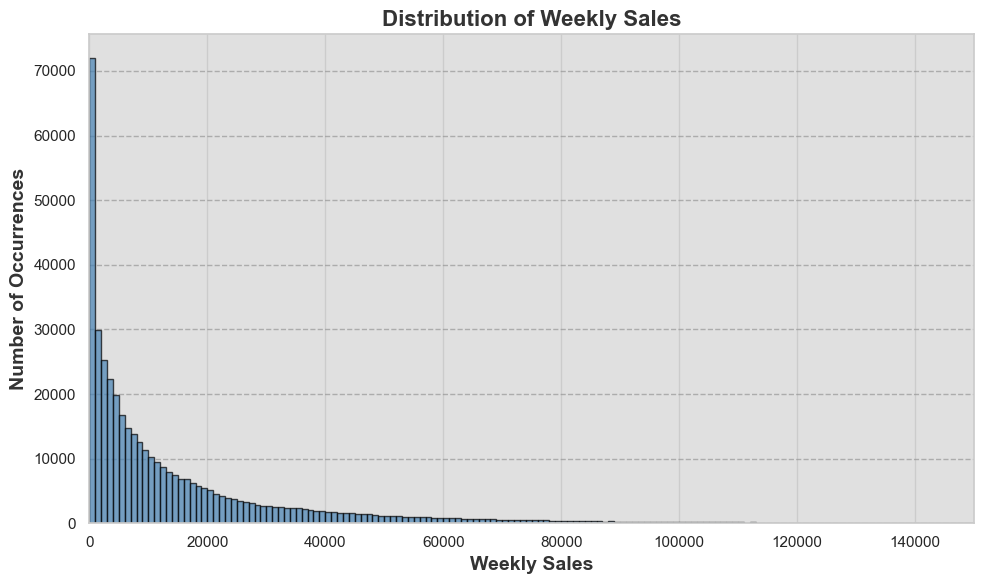

In [161]:
# Check the data type and sample values
print("Data type in df['Weekly_Sales']:", type(df['Weekly_Sales'].iloc[0]))
print("Sample values in df['Weekly_Sales']:\n", df['Weekly_Sales'].head())

# If the values are lists, tuples, or other structures, convert them to a one-dimensional structure
df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: x[0] if isinstance(x, (list, tuple, np.ndarray)) else x)

# Convert the column to a numeric type, ignoring errors, and into a numpy array
weekly_sales_array = pd.to_numeric(df['Weekly_Sales'], errors='coerce').values

# Remove NaN values
weekly_sales_array = weekly_sales_array[~np.isnan(weekly_sales_array)]

# Determine the maximum value in the data
max_value = int(weekly_sales_array.max())

# Set the bins in increments of 1000 units
bins = np.arange(0, max_value + 1000, 1000)

# Set Seaborn aesthetics
sns.set(style="whitegrid")

# Display the histogram using Matplotlib
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.hist(weekly_sales_array, bins=bins, color='#4682B4', alpha=0.7, edgecolor='black')  # Use Steel Blue for consistency

# Set the X-axis range (example here, adjust as needed)
plt.xlim(0, 150000)  # Adjust the range according to your data

# Add title and labels with customized styling
plt.title('Distribution of Weekly Sales', fontsize=16, weight='bold', color='#333')  # Title in dark gray
plt.xlabel('Weekly Sales', fontsize=14, weight='bold', color='#333')  # Label in dark gray
plt.ylabel('Number of Occurrences', fontsize=14, weight='bold', color='#333')  # Label in dark gray

# Add grid and customize its appearance
plt.grid(axis='y', linestyle='--', alpha=0.7, color=(150/255, 150/255, 150/255, 0.5))  # Light dashed grid

# Set background color to light gray, consistent with previous plots
plt.gca().set_facecolor('#E0E0E0')

# Show the plot
plt.tight_layout()
plt.show()




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

#### 5.6.1.1  How big is anomaly problem?
</div>

In [162]:
# Grouping the data by store, week, and department to calculate the average weekly sales
grouped = df.groupby(['Store', 'week', 'Dept'])['Weekly_Sales'].mean().reset_index()
grouped.rename(columns={'Weekly_Sales': 'Average_Weekly_Sales'}, inplace=True)

# Merging the average values back into the original data
df = df.merge(grouped, on=['Store', 'week', 'Dept'], suffixes=('', '_avg'))

# Setting a threshold to detect anomalies
# For example, if the sales are less than 10% of the average value
df['Anomaly'] = df['Weekly_Sales'] < 0.2 * df['Average_Weekly_Sales']

# Filtering the anomalies
anomalies = df[df['Anomaly']]

# Displaying the results
print("Number of detected anomalies:", anomalies.shape[0])
print(anomalies[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Average_Weekly_Sales']])



Number of detected anomalies: 3611
        Store  Dept       Date  Weekly_Sales  Average_Weekly_Sales
102         1    36 2010-02-05        120.00           1084.053333
353         1    54 2011-02-11          4.88            159.200000
530         1    36 2011-02-18         64.50            920.446667
566         1    54 2011-02-18          5.88            224.266667
743         1    36 2011-02-25         80.50            498.820000
...       ...   ...        ...           ...                   ...
420151     45    18 2012-05-11          0.10             16.950000
420189     45    49 2012-08-10          2.97             52.125000
420212     45    49 2012-08-31          0.06             28.245000
420216     45    49 2012-09-07          5.00             45.640000
420220     45    49 2012-09-21         10.00             51.035000

[3611 rows x 5 columns]




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

#### 5.6.1.1  Store/Anomaly count
</div>

In [163]:

# Grouping data by store and week to calculate average weekly sales
grouped = df.groupby(['Store', 'week'])['Weekly_Sales'].mean().reset_index()
grouped.rename(columns={'Weekly_Sales': 'Average_Weekly_Sales'}, inplace=True)

# Merging average values with the original data
df = df.merge(grouped, on=['Store', 'week'], suffixes=('', '_avg'))

# Setting a threshold for anomaly detection
# Example: if sales are less than 20% of the average value
df['Anomaly'] = df['Weekly_Sales'] < 0.2 * df['Average_Weekly_Sales']

# Filtering anomalies
anomalies = df[df['Anomaly']]

# Grouping anomalies by store
anomalies_by_store = anomalies.groupby('Store').size().reset_index(name='Anomaly_Count')

# Sorting by the number of anomalies in descending order
anomalies_by_store_sorted = anomalies_by_store.sort_values(by='Anomaly_Count', ascending=False)

# Displaying stores with the highest number of anomalies
print(anomalies_by_store_sorted.head(40))  # Stores with the highest number of anomalies


    Store  Anomaly_Count
17     18            202
15     16            164
24     25            162
34     35            154
42     43            142
29     30            141
22     23            135
44     45            115
6       7            114
13     14            110
21     22            105
35     36            103
28     29             93
32     33             91
33     34             89
9      10             86
20     21             84
2       3             83
11     12             81
26     27             74
41     42             71
38     39             67
8       9             66
10     11             66
16     17             63
39     40             61
14     15             61
19     20             60
37     38             59
43     44             56
31     32             56
1       2             54
30     31             54
36     37             49
23     24             46
4       5             46
27     28             44
3       4             42
5       6             42


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Solution</h1>

  <p>
    We replace values below the 15th percentile to handle anomalies in weekly sales data. This approach removes extreme low values that might be errors or rare events, ensuring the dataset remains reliable. By targeting the 15th percentile, we adjust only the outliers while keeping most of the data intact. This method preserves the overall distribution of the data, making it more realistic for analysis.
  </p>
  <p>
    Instead of using normalization, which changes the scale of all data points and can distort important trends, we use percentiles. This approach focuses on correcting only the problematic values, maintaining the original structure and distribution of the data.
  </p>
</div>


In [164]:


# Calculating the 15th percentile of sales values
percentile_15 = np.percentile(df['Weekly_Sales'], 15)

# Replacing values lower than the 15th percentile with the 15th percentile value
df.loc[df['Weekly_Sales'] < percentile_15, 'Weekly_Sales'] = percentile_15

# Displaying the first few rows after the replacement
print(df[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Average_Weekly_Sales']].head())




   Store  Dept       Date  Weekly_Sales  Average_Weekly_Sales
0      1     1 2010-02-05      24924.50          23366.916667
1      1     1 2011-02-04      21665.76          23366.916667
2      1     1 2012-02-03      23510.49          23366.916667
3      1     2 2010-02-05      50605.27          50585.543333
4      1     2 2011-02-04      46829.12          50585.543333


In [165]:
# Grouping data by store, week, and department to calculate average weekly sales
grouped = df.groupby(['Store', 'week', 'Dept'])['Weekly_Sales'].mean().reset_index()
grouped.rename(columns={'Weekly_Sales': 'Average_Weekly_Sales'}, inplace=True)

# Merging average values with the original data
df = df.merge(grouped, on=['Store', 'week', 'Dept'], suffixes=('', '_avg'))

# Setting a threshold for anomaly detection
# Example: if sales are less than 20% of the average value
df['Anomaly'] = df['Weekly_Sales'] < 0.2 * df['Average_Weekly_Sales']

# Filtering anomalies
anomalies = df[df['Anomaly']]

# Displaying the results
print("Number of detected anomalies:", anomalies.shape[0])
print(anomalies[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Average_Weekly_Sales']])

# Removing anomalies from the dataset
df = df[~df['Anomaly']]

# Dropping the 'Anomaly' column as it is no longer needed
df = df.drop(columns=['Anomaly'])

# Displaying the number of remaining records
print("Number of records after removing anomalies:", df.shape[0])


Number of detected anomalies: 136
        Store  Dept       Date  Weekly_Sales  Average_Weekly_Sales
2419        1    18 2010-04-23       754.648           4498.146667
2421        1    18 2012-04-20       754.648           4498.146667
2795        1    18 2012-04-27       754.648           3996.550000
4699        1    96 2010-07-02      5265.090          28427.840000
12010       2    18 2011-04-01      1905.690          10399.626667
...       ...   ...        ...           ...                   ...
335881     35    58 2011-09-02       775.000           3889.333333
362103     39    18 2010-04-16       754.648           4549.236667
362310     39    18 2010-04-23       754.648           7026.603333
362312     39    18 2012-04-20       754.648           7026.603333
411260     45    94 2010-02-19       754.648           4382.063333

[136 rows x 5 columns]
Number of records after removing anomalies: 420149




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.7 Department Analysis

</div>

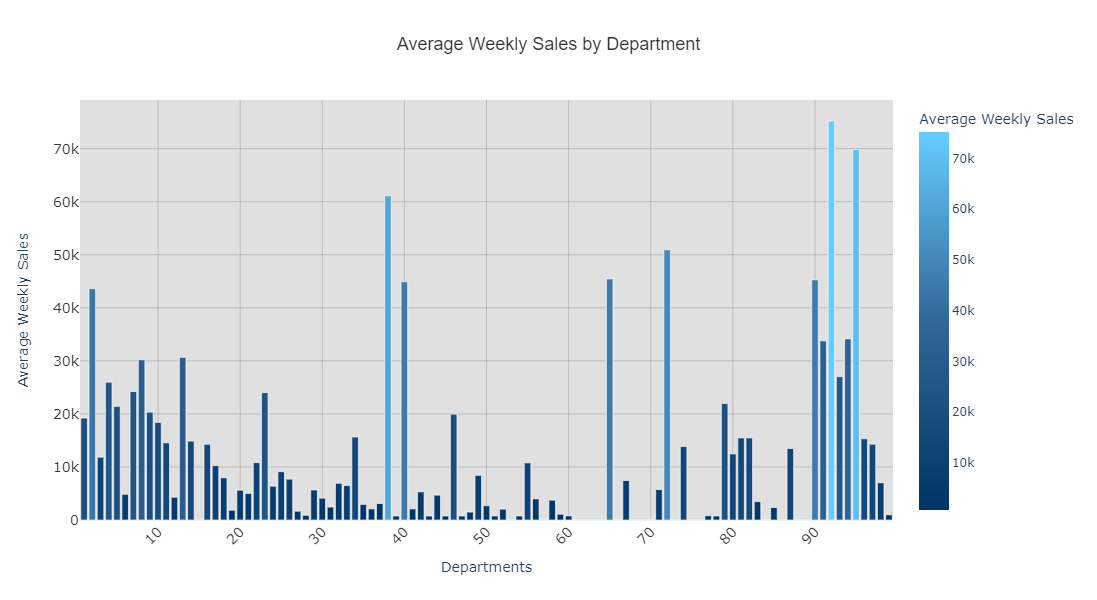

In [169]:
import plotly.express as px

# Calculating average weekly sales for each department
average_sales_per_dept = df.groupby('Dept')['Weekly_Sales'].mean().reset_index()

# Setting column names
average_sales_per_dept.columns = ['Dept', 'Average_Weekly_Sales']

# Define a custom color scale using shades of deep blue and sapphire
custom_colorscale = [
    [0, "#003366"],  # Dark Sapphire Blue
    [0.5, "#336699"],  # Deep Blue
    [1, "#66CCFF"]  # Light Blue for highlight
]

# Creating a bar chart in Plotly with custom color scale
fig = px.bar(
    average_sales_per_dept,
    x='Dept',
    y='Average_Weekly_Sales',
    title='Average Weekly Sales by Department',
    labels={'Dept': 'Departments', 'Average_Weekly_Sales': 'Average Weekly Sales'},
    color='Average_Weekly_Sales',
    color_continuous_scale=custom_colorscale  # Using the custom dark blue sapphire color scale
)

# Customizing the chart appearance to match the previous style
fig.update_layout(
    title_font=dict(size=18, color='#333', family='Arial'),  # Title font settings
    title_x=0.5,  # Title alignment
    xaxis_title='Departments',
    yaxis_title='Average Weekly Sales',
    xaxis_tickangle=-45,  # Rotating labels on the X-axis for better readability
    width=1000,  # Chart width
    height=600,  # Chart height
    template='plotly_white',  # Use white background for consistency
    showlegend=False,  # Turn off the legend to keep the focus on the data
    plot_bgcolor='#E0E0E0',  # Set light gray background
    xaxis=dict(
        tickfont=dict(size=14, color='#333'),  # X-axis font style
        showgrid=True,  # Show grid for better readability
        gridcolor='rgba(150, 150, 150, 0.5)'  # Light gray grid lines
    ),
    yaxis=dict(
        tickfont=dict(size=14, color='#333'),  # Y-axis font style
        showgrid=True,  # Show grid
        gridcolor='rgba(150, 150, 150, 0.5)'  # Light gray grid lines
    )
)

# Show the chart
fig.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Analysis of Department Sales</h1>

  <p>
    From the first graph, it can be observed that one department, specifically between 60-80 (likely department 72), exhibits higher sales values. However, when we examine the average sales, department 92 stands out with higher mean sales.
  </p>

  <p>
    Department 72 appears to be seasonal in nature, as it demonstrates higher sales during specific seasons. Despite this, on average, department 92 consistently generates higher overall sales, indicating its stronger performance across the entire year.
  </p>
</div>


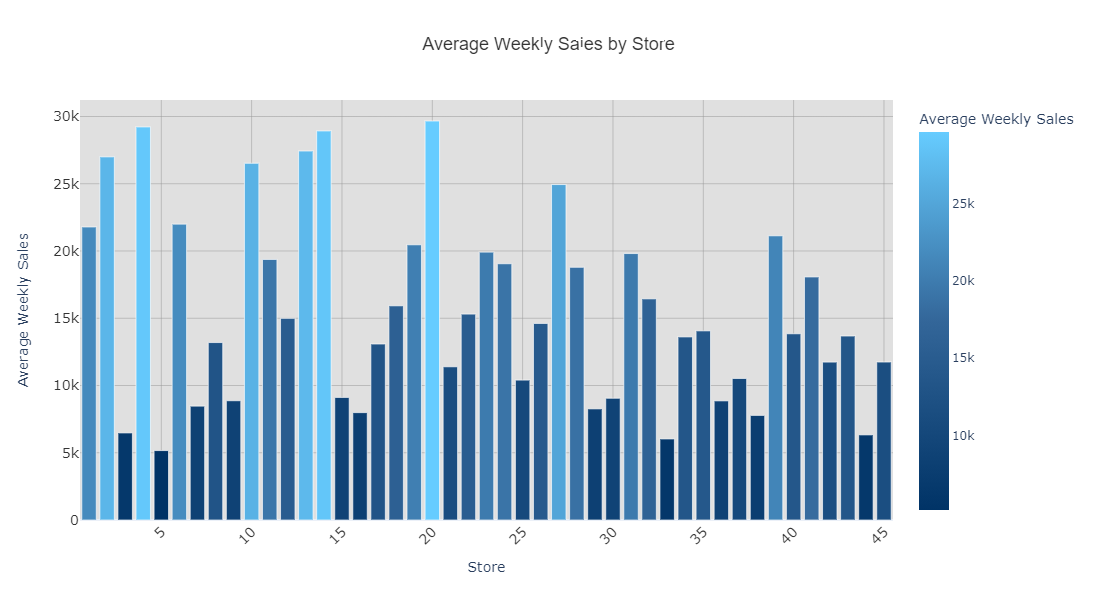

In [170]:


# Calculating average weekly sales for each store
average_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Setting column names
average_sales_per_store.columns = ['Store', 'Average_Weekly_Sales']

# Define a custom color scale using shades of dark blue and sapphire
custom_colorscale = [
    [0, "#003366"],  # Dark Sapphire Blue
    [0.5, "#336699"],  # Deep Blue
    [1, "#66CCFF"]  # Light Blue for highlight
]

# Creating a bar chart in Plotly with custom color scale
fig = px.bar(
    average_sales_per_store,
    x='Store',
    y='Average_Weekly_Sales',
    title='Average Weekly Sales by Store',
    labels={'Store': 'Store', 'Average_Weekly_Sales': 'Average Weekly Sales'},
    color='Average_Weekly_Sales',
    color_continuous_scale=custom_colorscale  # Using the custom dark blue sapphire color scale
)

# Customizing the chart appearance to match the previous style
fig.update_layout(
    title_font=dict(size=18, color='#333', family='Arial'),  # Title font settings
    title_x=0.5,  # Title alignment
    xaxis_title='Store',
    yaxis_title='Average Weekly Sales',
    xaxis_tickangle=-45,  # Rotating labels on the X-axis for better readability
    width=1200,  # Chart width
    height=600,  # Chart height
    template='plotly_white',  # Use white background for consistency
    showlegend=False,  # Turn off the legend to keep the focus on the data
    plot_bgcolor='#E0E0E0',  # Set light gray background
    xaxis=dict(
        tickfont=dict(size=14, color='#333'),  # X-axis font style
        showgrid=True,  # Show grid for better readability
        gridcolor='rgba(150, 150, 150, 0.5)'  # Light gray grid lines
    ),
    yaxis=dict(
        tickfont=dict(size=14, color='#333'),  # Y-axis font style
        showgrid=True,  # Show grid
        gridcolor='rgba(150, 150, 150, 0.5)'  # Light gray grid lines
    )
)

# Show the chart
fig.show()


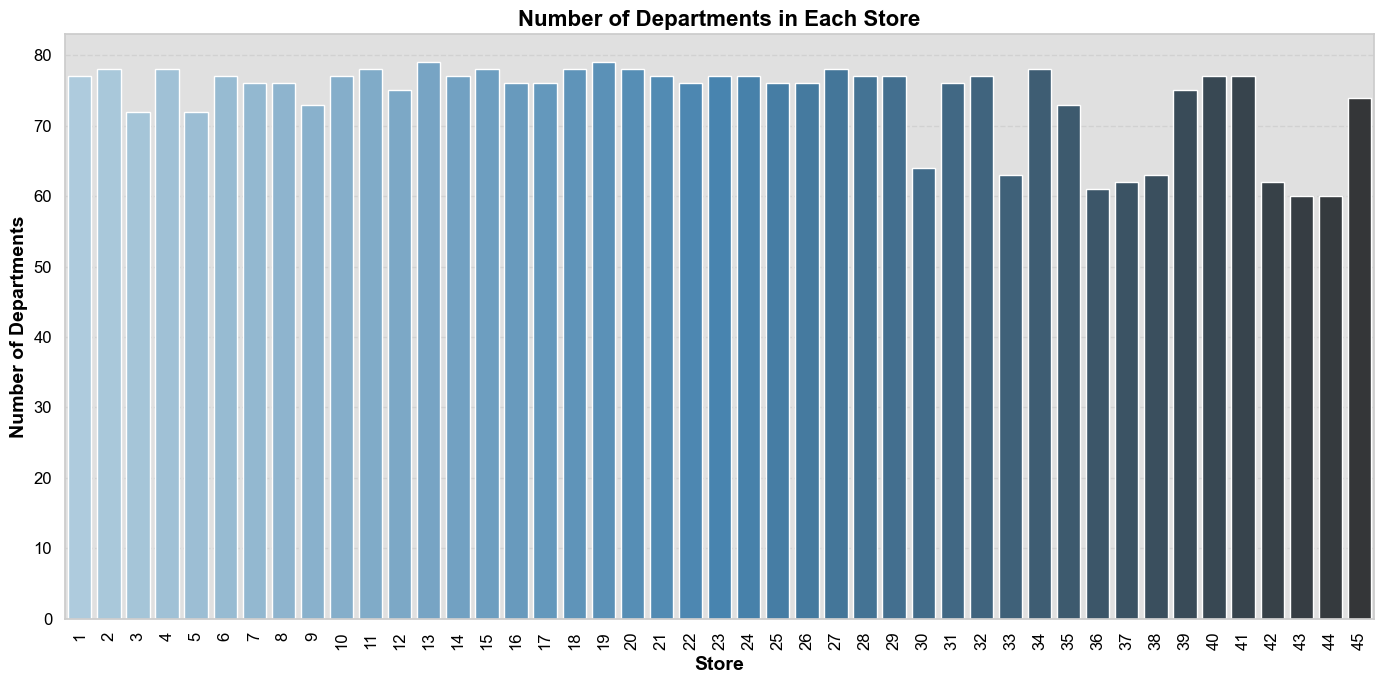

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the column with duplicates (if unnecessary)
df = df.loc[:, ~df.columns.duplicated()]

# Alternatively, rename the column if it's needed
df = df.rename(columns={'Average_Weekly_Sales_avg': 'Average_Weekly_Sales_new'})

# 1. Grouping and Counting: How many departments are in each store?
stores_departments = df.explode('Store').groupby('Store')['Dept'].apply(list).reset_index()

# Adding a column that counts unique departments in each store
stores_departments['Number of Departments'] = stores_departments['Dept'].apply(lambda x: len(set(x)))

# Bar chart: number of departments in each store
plt.figure(figsize=(14, 7))  # Increased size for better readability
sns.barplot(data=stores_departments, x='Store', y='Number of Departments', palette='Blues_d')  # Adjusted palette for a darker, more cohesive style
plt.title('Number of Departments in Each Store', fontsize=16, weight='bold', color='black')  # Title font consistency
plt.xlabel('Store', fontsize=14, weight='bold', color='black')  # Label font consistency
plt.ylabel('Number of Departments', fontsize=14, weight='bold', color='black')  # Label font consistency
plt.xticks(rotation=90, fontsize=12, color='black')  # Rotated and styled X-axis labels
plt.yticks(fontsize=12, color='black')  # Styled Y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light dashed grid for clarity
plt.gca().set_facecolor('#E0E0E0')  # Light gray background for consistency with previous charts

# Displaying the chart
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Number of Departments in Each Store</h1>
  
  <p>This table shows the number of unique departments available in each store.</p>
  
  <h4 style="font-size: 18px; margin-top: 10px;">Key Insights:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>Department Diversity:</strong> The number of departments per store ranges between 60 and 79. Larger stores, like stores 12 and 18, offer up to 79 departments, indicating they may have a broader selection of products. Smaller stores, such as 42 and 43, offer only 60 departments, suggesting a more specialized assortment.</li>
    <li><strong>Predominant Number of Departments:</strong> Most stores have between 76 and 78 departments. This suggests a standardized set of departments appearing in most stores, likely for consistency in product offerings and logistics.</li>
    <li><strong>Store Specialization:</strong> Stores with fewer than 70 departments may focus on specific product categories, catering to niche markets with specialized needs.</li>
  </ul>
</div>


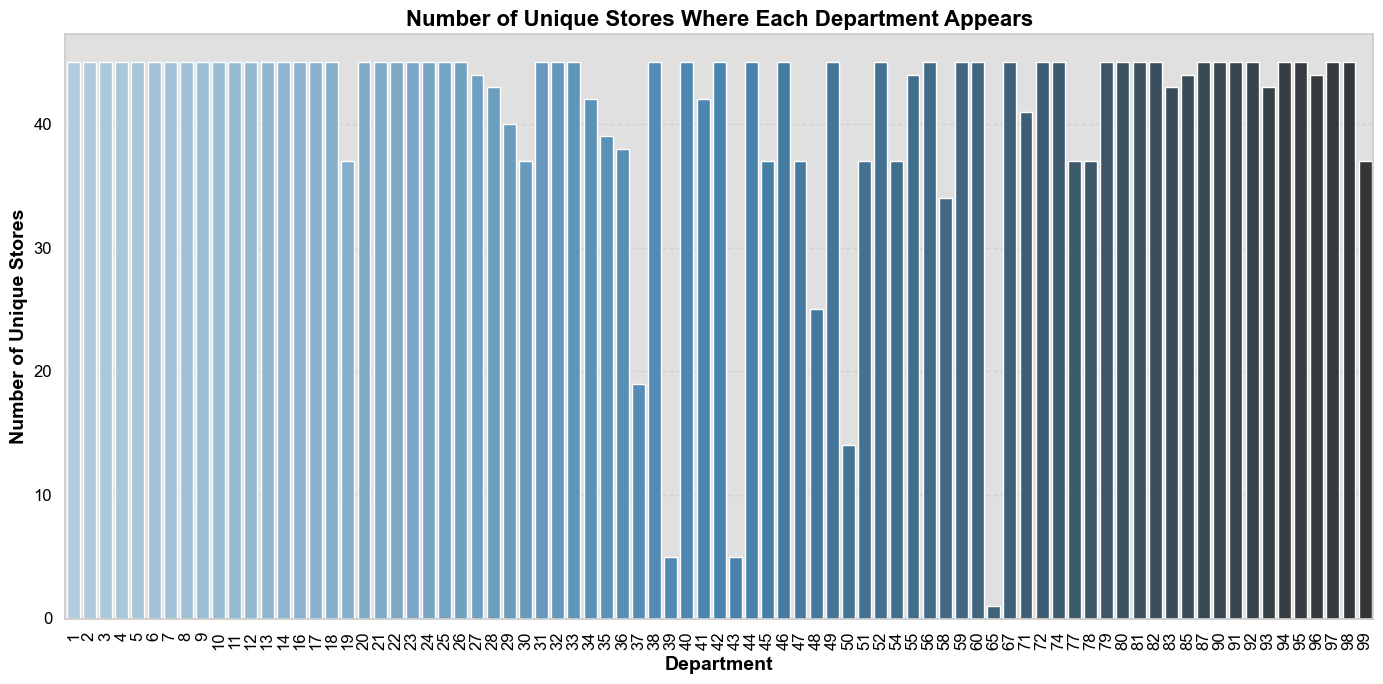

In [176]:

# First, explode the 'Stores' list so that each store has its own row for a given department
df_exploded = df.explode('Store')

# 2. Frequency Analysis: How often does each department appear in unique stores?
# Grouping by 'Dept' and counting unique 'Stores'
department_frequency = df_exploded.groupby('Dept')['Store'].nunique().reset_index()

# Renaming the column for better readability
department_frequency.columns = ['Dept', 'Unique_Stores_Count']

# Sorting to display the most common departments first
department_frequency = department_frequency.sort_values(by='Unique_Stores_Count', ascending=False)

# Visualization: Bar chart for the number of unique stores in each department
plt.figure(figsize=(14, 7))  # Adjusted size for better visibility
sns.barplot(data=department_frequency, x='Dept', y='Unique_Stores_Count', palette='Blues_d')  # Darker, cohesive color palette

# Title and labels
plt.title('Number of Unique Stores Where Each Department Appears', fontsize=16, weight='bold', color='black')  # Consistent title font
plt.xlabel('Department', fontsize=14, weight='bold', color='black')  # Consistent label styling
plt.ylabel('Number of Unique Stores', fontsize=14, weight='bold', color='black')  # Consistent label styling

# Adjusting the ticks and grid for better readability
plt.xticks(rotation=90, fontsize=12, color='black')  # Styled X-axis labels
plt.yticks(fontsize=12, color='black')  # Styled Y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light dashed grid for better readability

# Consistent background
plt.gca().set_facecolor('#E0E0E0')  # Light gray background

# Displaying the plot with layout adjustments
plt.tight_layout()  # Prevent overlap of labels
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Department Occurrence in Unique Stores</h1>
  
  <p>This table shows the number of unique stores where each department appears.</p>
  
  <h4 style="font-size: 18px; margin-top: 10px;">Key Insights:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>Universal Departments:</strong> Departments like 1, 72, 33, 38, and 40 are present in up to 45 stores. These are likely core categories, covering items such as groceries, clothing, or electronics, which are in high demand across most stores.</li>
    <li><strong>Less Common Departments:</strong> Departments like 37, 50, 43, 39, and 65 appear in fewer stores (1 to 19). These may represent more specialized offerings tailored to specific local needs. Department 65, appearing in only one store, suggests a unique or specialized product line.</li>
  </ul>

  <h3 style="font-size: 20px; font-weight: bold;">Conclusion</h3>
  <p>The data reflect both universal and specialized approaches to department management across stores. Larger stores offer a more versatile assortment, while smaller stores may focus on specific categories. Departments with higher frequency suggest standard offerings, while those present in fewer stores reflect niche or experimental assortments tailored to local markets.</p>
</div>




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.8 Fuel Price, CPI , Unemployment , Temperature Effects

</div>




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.8.1 Weekly Fuel Price
</div>

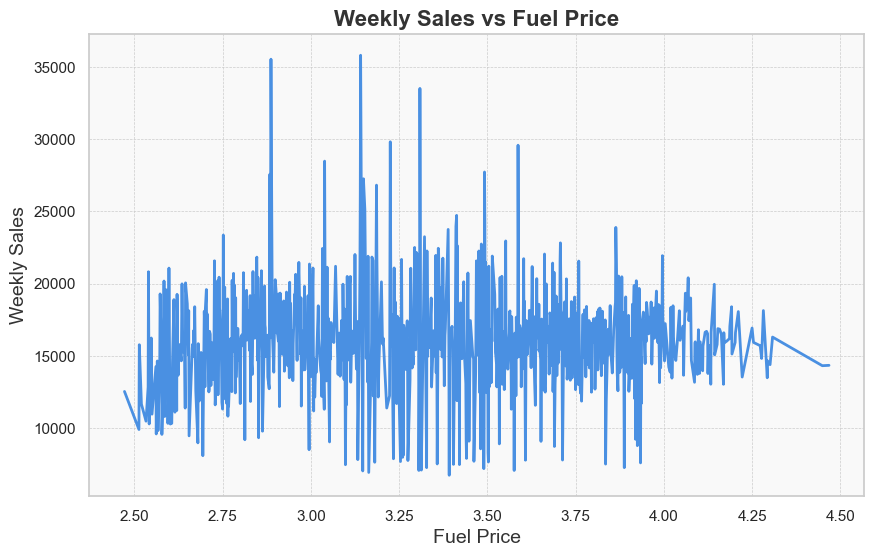

In [177]:

# Create the pivot table
fuel_price = pd.pivot_table(df, values="Weekly_Sales", index="Fuel_Price")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(fuel_price, color='#4a90e2', linewidth=2)

# Adding title and labels
plt.title('Weekly Sales vs Fuel Price', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Fuel Price', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.8.2 Temperature
</div>

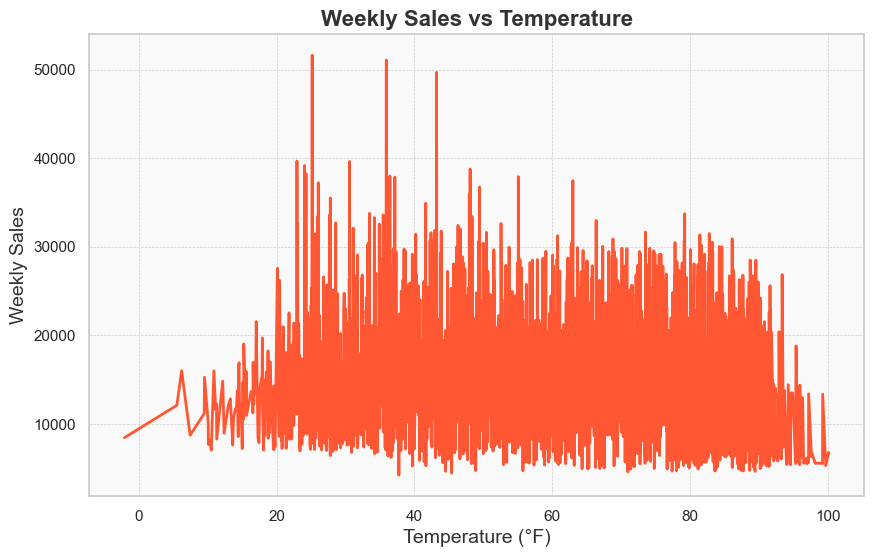

In [178]:


# Create the pivot table
temp = pd.pivot_table(df, values="Weekly_Sales", index="Temperature")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(temp, color='#FF5733', linewidth=2)  # Using a different color for variety

# Adding title and labels
plt.title('Weekly Sales vs Temperature', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Temperature (°F)', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.8.3 CPI
</div>

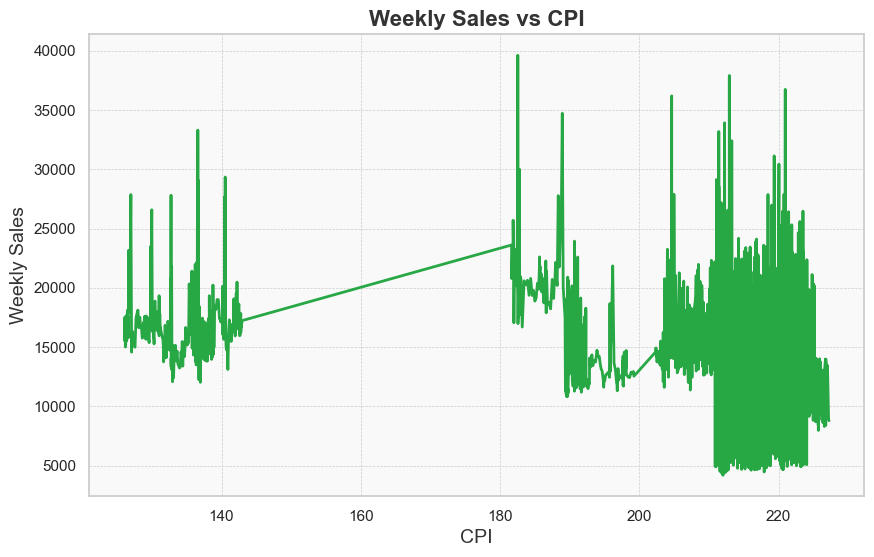

In [179]:


# Create the pivot table
CPI = pd.pivot_table(df, values="Weekly_Sales", index="CPI")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(CPI, color='#28a745', linewidth=2)  # Using a green color for variety

# Adding title and labels
plt.title('Weekly Sales vs CPI', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('CPI', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.8.4 Unemployment rate
</div>

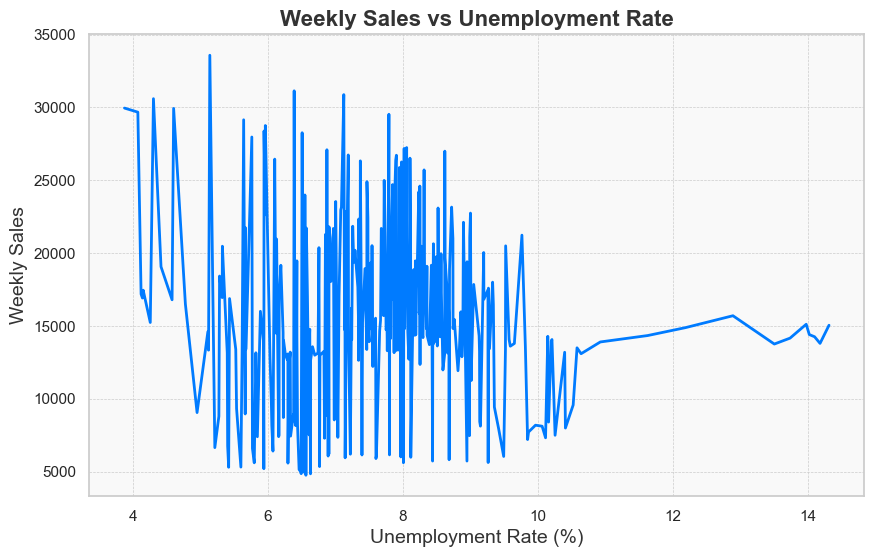

In [180]:

# Create the pivot table
unemployment = pd.pivot_table(df, values="Weekly_Sales", index="Unemployment")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(unemployment, color='#007bff', linewidth=2)  # Using a blue color for consistency

# Adding title and labels
plt.title('Weekly Sales vs Unemployment Rate', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Unemployment Rate (%)', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Analysis of Sales Factors</h1>

  <p>
    From the analysis, it is evident that there are no significant patterns between the following factors and weekly sales:
  </p>
  <ul style="margin-left: 20px;">
    <li>CPI</li>
    <li>Temperature</li>
    <li>Unemployment Rate</li>
    <li>Fuel Price</li>
  </ul>
  <p>
    Additionally, it is worth noting that CPI values between 140 and 180 are not available in the dataset.
  </p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Summary of Exploratory Data Analysis (EDA)</h1>

  <p>
    The data cleaning process revealed no significant missing values across columns. Rows with weekly sales higher than 0 were retained, as negative values accounted for only 0.3% of the data and were removed. Null values in markdowns were replaced with zero, reflecting instances where no markdown was recorded in the department.
  </p>

  <h2 style="font-size: 20px; font-weight: bold;">Explorations & Findings</h2>
  <ul style="margin-left: 20px;">
    <li> The dataset includes 45 stores and 81 departments, though departments are not consistently present across all stores.</li>
    <li> Department 72 shows higher weekly sales, but department 92 leads in average sales, suggesting the influence of seasonal factors such as Thanksgiving.</li>
    <li> The highest sales figures are recorded in department 72 during the Thanksgiving holiday.</li>
    <li> Stores 10 and 35 sometimes show higher weekly sales, but stores 20 and 4 typically rank highest in average sales, indicating specific regions experience elevated seasonal sales.</li>
    <li> Stores are classified into types A, B, and C based on size, with almost half categorized as type A (larger than 150,000 sq ft).</li>
    <li> Holiday sales averages are higher than regular days, with Thanksgiving surpassing Christmas in total holiday sales, as noted by Walmart.</li>
    <li> Sales in 2010 were higher compared to 2011 and 2012, though missing data for November and December 2012 suggests those months could elevate 2012's sales figures.</li>
    <li> Weeks 51 and 47 have the highest sales values, followed by weeks 50 to 48, and the 22nd week, aligning with the end of May.</li>
    <li> January sales are notably lower compared to other months, likely due to the surge in November and December sales.</li>
    <li> No discernible patterns exist between weekly sales and factors such as CPI, temperature, unemployment rate, or fuel price.</li>
  </ul>
</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 6. Modelling

</div>

In [181]:
df1 = df.copy() 

In [182]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,year,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Event,Has_Markdown,Average_Weekly_Sales,Average_Weekly_Sales_new
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,A,151315,2,2010,5,False,False,False,False,None,False,23366.916667,22623.426528
1,1,1,2011-02-04,21665.76,False,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,A,151315,2,2011,5,False,False,False,False,None,False,23366.916667,22623.426528
2,1,1,2012-02-03,23510.49,False,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.4,220.172015,7.348,A,151315,2,2012,5,False,False,False,False,None,True,23366.916667,22623.426528
3,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,A,151315,2,2010,5,False,False,False,False,None,False,50585.543333,22623.426528
4,1,2,2011-02-04,46829.12,False,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,A,151315,2,2011,5,False,False,False,False,None,False,50585.543333,22623.426528


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 6.1. Droping columns
</div>

In [183]:
 drop_col = ['Event','Average_Weekly_Sales_new','Has_Markdown','IsHoliday','Average_Weekly_Sales']
df1.drop(drop_col, axis=1, inplace=True) # dropping columns

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 6.2 Encoding
</div>

In [184]:
# Encoding True/False columns as 0 and 1
df1['Super_Bowl'] = df1['Super_Bowl'].astype(int)
df1['Labor_Day'] = df1['Labor_Day'].astype(int)
df1['Thanksgiving'] = df1['Thanksgiving'].astype(int)
df1['Christmas'] = df1['Christmas'].astype(int)

# Encoding the 'Type' column (categorical variable) using One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['Type'], prefix='Type')
df1['Type_A'] = df1['Type_A'].astype(int)
df1['Type_B'] = df1['Type_B'].astype(int)
df1['Type_C'] = df1['Type_C'].astype(int)


In [185]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)
df1.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month,year,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,151315,2,2010,5,0,0,0,0,1,0,0
1,1,1,2011-02-04,21665.76,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,151315,2,2011,5,0,0,0,0,1,0,0
2,1,1,2012-02-03,23510.49,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.4,220.172015,7.348,151315,2,2012,5,0,0,0,0,1,0,0
3,1,2,2010-02-05,50605.27,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,151315,2,2010,5,0,0,0,0,1,0,0
4,1,2,2011-02-04,46829.12,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,151315,2,2011,5,0,0,0,0,1,0,0


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Data Encoding and Correlation Analysis</h1>

  <p>
    One-Hot Encoding is often preferred for nominal categorical variables, as it helps prevent misinterpretation of numerical values by machine learning models, ensuring accurate data representation.
  </p>

  <h2 style="font-size: 20px; font-weight: bold;">Encoding Specific Columns</h2>
  <ul style="margin-left: 20px;">
    <li> <strong>Super_Bowl, Labor_Day, Thanksgiving, Christmas:</strong> These columns contain True/False values, which are converted to 0 and 1, making them suitable for correlation analysis.</li>
    <li> <strong>Type:</strong> The LabelEncoder is used to encode the Type variable, transforming categorical values A, B, and C into 0, 1, and 2 respectively.</li>
  </ul>

  <h2 style="font-size: 20px; font-weight: bold;">Data Selection for Correlation</h2>
  <p>
    The <code>select_dtypes</code> method is utilized to filter and select only numeric columns from the DataFrame, ensuring textual data is excluded from correlation calculations.
  </p>

  <h2 style="font-size: 20px; font-weight: bold;">Correlation Heatmap</h2>
  <p>
    The <code>sns.heatmap</code> function generates a correlation heatmap, with <code>annot=True</code> displaying the correlation values directly on the heatmap, and <code>cmap='coolwarm'</code> setting the color palette for visual clarity.
  </p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 6.3 Removing multicollinearity
</div>

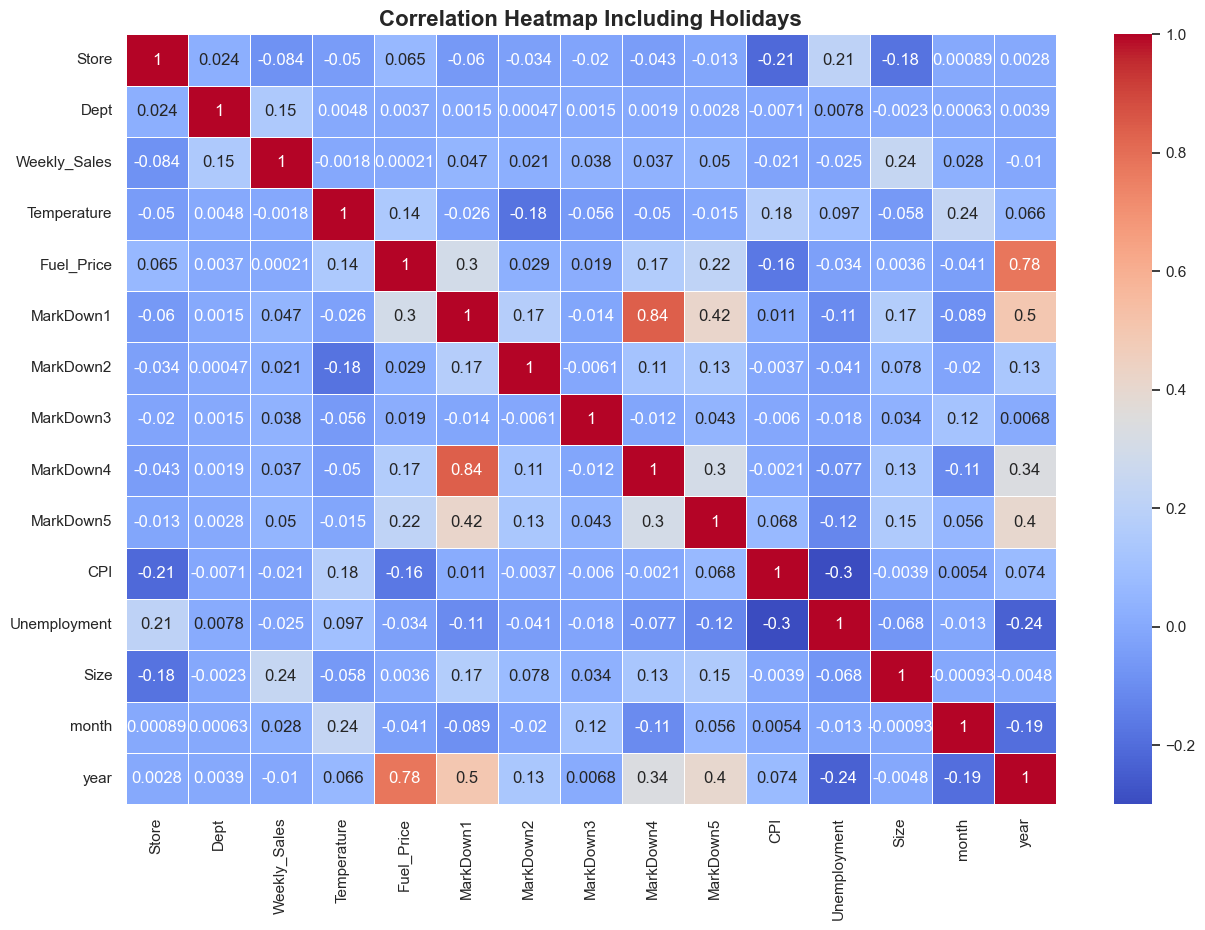

In [186]:

# Selecting only numeric columns
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Enlarging the title
plt.title('Correlation Heatmap Including Holidays', fontsize=16, weight='bold')

# Show the plot
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Correlation Analysis</h1>

  <h2 style="font-size: 20px; font-weight: bold;">High Correlations</h2>
  <ul style="margin-left: 20px;">
    <li> <strong>MarkDown1 and MarkDown4:</strong> With a correlation of 0.838, these variables exhibit a very strong relationship, indicating that the discounts may often be applied together or have similar effects.</li>
    <li> <strong>Weekly_Sales and Size:</strong> The correlation of 0.242 suggests a moderate positive relationship, implying that larger stores may experience higher sales, though the relationship is not very strong.</li>
    <li> <strong>CPI and Unemployment:</strong> A correlation of -0.299 indicates a moderate inverse relationship, suggesting that higher inflation (CPI) may be associated with lower unemployment rates.</li>
    <li> <strong>Fuel_Price and MarkDown1/MarkDown5:</strong> Correlations of 0.297 and 0.215 respectively indicate some influence of fuel prices on discounting decisions, particularly for MarkDown1 and MarkDown5.</li>
  </ul>

  <h2 style="font-size: 20px; font-weight: bold;">Low or No Correlations</h2>
  <ul style="margin-left: 20px;">
    <li> <strong>Weekly_Sales and Fuel_Price:</strong> The correlation of 0.000235 suggests that fuel prices have virtually no impact on sales.</li>
    <li> <strong>Weekly_Sales and Temperature:</strong> With a correlation of -0.001721, there appears to be no clear relationship between sales and temperature.</li>
  </ul>

  <h2 style="font-size: 20px; font-weight: bold;">General Conclusions</h2>
  <ul style="margin-left: 20px;">
    <li> Discounts (MarkDowns) show the strongest influence among themselves and a notable connection with fuel prices, which could be significant for promotional strategies.</li>
    <li> Store size has a moderate impact on sales, consistent with intuitive expectations.</li>
    <li> Variables like temperature and fuel prices appear to have minimal influence on sales within this dataset.</li>
    <li> For sales predictions, focusing on variables with higher correlations to <code>Weekly_Sales</code> (such as store size) could be beneficial, while variables with very low correlations, like temperature, might be less relevant.</li>
  </ul>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Key Variables to Consider</h1>

  <h2 style="font-size: 20px; font-weight: bold;">MarkDown1 and MarkDown4</h2>
  <ul style="margin-left: 20px;">
    <li> <strong>Correlation:</strong> A correlation of 0.838 indicates a very strong relationship, suggesting that these variables provide nearly identical information.</li>
    <li> <strong>Considerations:</strong> It may be prudent to remove one of these variables from the model to reduce redundancy. Alternatively, combining them into a single variable, such as their sum or average, could be beneficial.</li>
  </ul>

  <h2 style="font-size: 20px; font-weight: bold;">Fuel_Price and MarkDown1/MarkDown5</h2>
  <ul style="margin-left: 20px;">
    <li> <strong>Correlations:</strong> Fuel_Price has correlations of 0.297 with MarkDown1 and 0.215 with MarkDown5. While these correlations are moderate, they should be monitored for potential multicollinearity.</li>
    <li> <strong>Next Steps:</strong> If multicollinearity is detected (assessable using the Variance Inflation Factor - VIF), consider removing one of these variables to improve model stability.</li>
  </ul>

  <h2 style="font-size: 20px; font-weight: bold;">CPI and Unemployment</h2>
  <ul style="margin-left: 20px;">
    <li> <strong>Correlation:</strong> The correlation of -0.299 indicates a moderate inverse relationship. While this is not immediately concerning, it is advisable to monitor these variables in regression models for potential redundancy.</li>
  </ul>

  <h2 style="font-size: 20px; font-weight: bold;">Variable Reduction</h2>
  <ul style="margin-left: 20px;">
    <li> <strong>Low Impact Variables:</strong> Variables such as Temperature, Unemployment, and CPI have minimal impact on weekly sales and will be excluded from the analysis to streamline the model.</li>
    <li> <strong>Redundant MarkDowns:</strong> MarkDown4 and MarkDown5, being highly correlated with MarkDown1, will also be considered for removal to prevent multicollinearity issues.</li>
    <li> <strong>Approach:</strong> The initial model will be tested without these variables to evaluate its performance and ensure clarity in the analysis.</li>
  </ul>
</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 6.3.1 VIF-multicollinearity determinant
</div>

In [187]:


# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Standardizing the variables
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Function to calculate VIF
def variance_inflation_factor(X, var_index):
    # Selecting the variable for modeling
    X_target = X[:, var_index]
    
    # Excluding this variable from the independent set
    X_others = np.delete(X, var_index, axis=1)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X_others, X_target)
    
    # Calculating the R^2 coefficient
    r_squared = r2_score(X_target, model.predict(X_others))
    
    # Avoid division by zero by checking if R² is equal to or nearly equal to 1
    if r_squared >= 1.0 - 1e-10:  # Allows for a small margin to account for floating point precision
        return float('inf')  # Return infinity for VIF to indicate multicollinearity issue
    
    # Calculating VIF
    return 1 / (1 - r_squared)

# Calculating VIF for all variables
vif_data = calculate_vif(numeric_df_scaled)
print(vif_data)


        Variable       VIF
0          Store  1.125214
1           Dept  1.025596
2   Weekly_Sales  1.094323
3    Temperature  1.247725
4     Fuel_Price  3.492261
5      MarkDown1  4.473768
6      MarkDown2  1.092061
7      MarkDown3  1.028154
8      MarkDown4  3.545411
9      MarkDown5  1.390707
10           CPI  1.349486
11  Unemployment  1.287065
12          Size  1.169144
13         month  1.242889
14          year  4.766713


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">VIF Analysis and Considerations</h1>

  <p>
    One of the key variables that may present potential issues is <strong>MarkDown1</strong>, given its high correlation with other markdown variables. However, after performing the Variance Inflation Factor (VIF) analysis, it was found that the VIF values for all variables, including MarkDown1, are below the threshold of 5. 
  </p>

  <p>
    Generally, VIF values below 5 are not considered problematic, as they do not indicate severe multicollinearity. Therefore, we will not be removing <strong>MarkDown1</strong> from the analysis, as it does not significantly hinder model performance.
  </p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 6.4 Training/Test split
</div>



In [188]:
# Removing the 'Date' column from the DataFrame
df1 = df1.drop(columns=['Date'])


In [189]:

from sklearn.model_selection import train_test_split

# Preparing the data
X = df1.drop(columns=['Weekly_Sales'])  # Target variable
y = df1['Weekly_Sales']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [190]:
df1.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month,year,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Type_A,Type_B,Type_C
0,1,1,24924.50,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,151315,2,2010,5,0,0,0,0,1,0,0
1,1,1,21665.76,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,151315,2,2011,5,0,0,0,0,1,0,0
2,1,1,23510.49,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.4,220.172015,7.348,151315,2,2012,5,0,0,0,0,1,0,0
3,1,2,50605.27,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,151315,2,2010,5,0,0,0,0,1,0,0
4,1,2,46829.12,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,151315,2,2011,5,0,0,0,0,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error  # Dodajemy import dla mean_squared_error


# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=10)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating MSE (Mean Squared Error)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE for the Random Forest model: {mse_rf}')

# Calculating RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mse_rf)
print(f'RMSE for the Random Forest model: {rmse_rf}')

# Calculating MAE (Mean Absolute Error)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE for the Random Forest model: {mae_rf}')

# Calculating R^2 (R-squared)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R^2 for the Random Forest model: {r2_rf}')

# Calculating MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f'MAPE for the Random Forest model: {mape_rf}')


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# Tworzymy model BaggingRegressor
bag_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42, n_jobs=-1)

# Dopasowujemy model do danych treningowych
bag_model.fit(X_train, y_train)

# Predykcje na zbiorze testowym
y_pred_bag = bag_model.predict(X_test)

# Oceny
mse_bag = mean_squared_error(y_test, y_pred_bag)
rmse_bag = np.sqrt(mse_bag)
mae_bag = mean_absolute_error(y_test, y_pred_bag)
r2_bag = r2_score(y_test, y_pred_bag)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_bag = mean_absolute_percentage_error(y_test, y_pred_bag)

# Wyniki
print(f'MSE for the BaggingRegressor model: {mse_bag}')
print(f'RMSE for the BaggingRegressor model: {rmse_bag}')
print(f'MAE for the BaggingRegressor model: {mae_bag}')
print(f'R^2 for the BaggingRegressor model: {r2_bag}')
print(f'MAPE for the BaggingRegressor model: {mape_bag}')


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Evaluation of Model Performance</h1>

  <h3 style="font-size: 20px;">Contextual Assessment:</h3>
  <ul style="margin-left: 20px;">
    <li><strong>Mean Weekly Sales:</strong> The average weekly sales amount to approximately <strong>16,108</strong>.</li>
    <li><strong>Seasonality Consideration:</strong> It's important to note that sales data may exhibit strong seasonality (e.g., higher sales during holidays or specific events), which can lead to fluctuations in model performance. Therefore, comparing error metrics like RMSE or MSE against the mean weekly sales might not fully reflect the model's predictive capabilities in cases of seasonality.</li>
  </ul>

  <h3 style="font-size: 20px;">RMSE Assessment:</h3>
  <ul style="margin-left: 20px;">
    <li><strong>RMSE Value:</strong> The RMSE is about <strong>3,445</strong>.</li>
    <li><strong>Percentage of Mean:</strong> This RMSE represents around <strong>21.4%</strong> of the mean value <strong>(3,445 / 16,108 * 100)</strong>.</li>
    <li><strong>Target Comparison:</strong> While the target of achieving an RMSE below <strong>10%</strong> of the mean weekly sales (about <strong>1,610.80</strong>) is an ambitious goal, it may not always be practical due to seasonality, which can cause higher variance in sales. Therefore, this threshold might need adjustment depending on seasonal patterns and cycles.</li>
    <li><strong>Seasonality Impact:</strong> Seasonal fluctuations might lead to periods of higher or lower error, and a fixed 10% RMSE threshold might not always be ideal for evaluating model performance in such contexts.</li>
  </ul>
</div>
